In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../Resources/diabetes_health_data.csv')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
# Split our preprocessed data into our features and target arrays
y = df["Diabetes_012"].values
X = df.drop(columns="Diabetes_012").values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [4]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 30
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 120)               2640      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                6050      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 10,251
Trainable params: 10,251
Non-trainable params: 0
_________________________________________________________________


In [6]:
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
fit_model = nn.fit(X_train_scaled,y_train, batch_size=32, epochs=200, callbacks=[callback], validation_split=0.2)

Epoch 1/200
4757/4757 [==============================] - 6s 1ms/step - loss: -6.8217 - accuracy: 0.7207 - val_loss: -37.1772 - val_accuracy: 0.6868
Epoch 2/200
4757/4757 [==============================] - 5s 1ms/step - loss: -256.2290 - accuracy: 0.7015 - val_loss: -575.8812 - val_accuracy: 0.7452
Epoch 3/200
4757/4757 [==============================] - 5s 1ms/step - loss: -1691.1383 - accuracy: 0.6927 - val_loss: -2569.0312 - val_accuracy: 0.7153
Epoch 4/200
4757/4757 [==============================] - 5s 1ms/step - loss: -5644.5015 - accuracy: 0.6793 - val_loss: -7473.4253 - val_accuracy: 0.2432
Epoch 5/200
4757/4757 [==============================] - 5s 1ms/step - loss: -13907.9639 - accuracy: 0.6719 - val_loss: -16691.9980 - val_accuracy: 0.4620
Epoch 6/200
4757/4757 [==============================] - 5s 1ms/step - loss: -28485.8809 - accuracy: 0.6668 - val_loss: -31555.5859 - val_accuracy: 0.7169
Epoch 7/200
4757/4757 [==============================] - 5s 1ms/step - loss: -52405.2

4757/4757 [==============================] - 5s 1ms/step - loss: -131488952.0000 - accuracy: 0.6625 - val_loss: -106324144.0000 - val_accuracy: 0.7962
Epoch 53/200
4757/4757 [==============================] - 5s 1ms/step - loss: -141720528.0000 - accuracy: 0.6623 - val_loss: -113418496.0000 - val_accuracy: 0.7949
Epoch 54/200
4757/4757 [==============================] - 5s 1ms/step - loss: -152694880.0000 - accuracy: 0.6619 - val_loss: -123178536.0000 - val_accuracy: 0.7899
Epoch 55/200
4757/4757 [==============================] - 5s 1ms/step - loss: -164256720.0000 - accuracy: 0.6616 - val_loss: -131913864.0000 - val_accuracy: 0.7954
Epoch 56/200
4757/4757 [==============================] - 5s 1ms/step - loss: -176563920.0000 - accuracy: 0.6616 - val_loss: -141958080.0000 - val_accuracy: 0.7359
Epoch 57/200
4757/4757 [==============================] - 5s 1ms/step - loss: -189303392.0000 - accuracy: 0.6623 - val_loss: -151041008.0000 - val_accuracy: 0.7943
Epoch 58/200
4757/4757 [=====

4757/4757 [==============================] - 6s 1ms/step - loss: -1829159168.0000 - accuracy: 0.6628 - val_loss: -1447822080.0000 - val_accuracy: 0.7593
Epoch 102/200
4757/4757 [==============================] - 5s 1ms/step - loss: -1901360512.0000 - accuracy: 0.6632 - val_loss: -1507430400.0000 - val_accuracy: 0.7831
Epoch 103/200
4757/4757 [==============================] - 5s 1ms/step - loss: -1977437952.0000 - accuracy: 0.6631 - val_loss: -1552711296.0000 - val_accuracy: 0.6916
Epoch 104/200
4757/4757 [==============================] - 5s 1ms/step - loss: -2055503104.0000 - accuracy: 0.6626 - val_loss: -1623304960.0000 - val_accuracy: 0.7964
Epoch 105/200
4757/4757 [==============================] - 5s 1ms/step - loss: -2134887296.0000 - accuracy: 0.6635 - val_loss: -1674335488.0000 - val_accuracy: 0.7953
Epoch 106/200
4757/4757 [==============================] - 5s 1ms/step - loss: -2218305792.0000 - accuracy: 0.6631 - val_loss: -1749198336.0000 - val_accuracy: 0.7177
Epoch 107/20

4757/4757 [==============================] - 5s 1ms/step - loss: -8805731328.0000 - accuracy: 0.6632 - val_loss: -6857002496.0000 - val_accuracy: 0.7890
Epoch 151/200
4757/4757 [==============================] - 5s 1ms/step - loss: -9045497856.0000 - accuracy: 0.6635 - val_loss: -7013219328.0000 - val_accuracy: 0.0913
Epoch 152/200
4757/4757 [==============================] - 5s 1ms/step - loss: -9282902016.0000 - accuracy: 0.6634 - val_loss: -7237452288.0000 - val_accuracy: 0.7177
Epoch 153/200
4757/4757 [==============================] - 5s 1ms/step - loss: -9529747456.0000 - accuracy: 0.6622 - val_loss: -7443644928.0000 - val_accuracy: 0.6816
Epoch 154/200
4757/4757 [==============================] - 5s 1ms/step - loss: -9779395584.0000 - accuracy: 0.6631 - val_loss: -7629586432.0000 - val_accuracy: 0.6914
Epoch 155/200
4757/4757 [==============================] - 5s 1ms/step - loss: -10033624064.0000 - accuracy: 0.6626 - val_loss: -7821492224.0000 - val_accuracy: 0.7957
Epoch 156/2

4757/4757 [==============================] - 5s 1ms/step - loss: -26574813184.0000 - accuracy: 0.6625 - val_loss: -20664795136.0000 - val_accuracy: 0.0243
Epoch 199/200
4757/4757 [==============================] - 5s 1ms/step - loss: -27112771584.0000 - accuracy: 0.6625 - val_loss: -21080944640.0000 - val_accuracy: 0.7815
Epoch 200/200
4757/4757 [==============================] - 5s 1ms/step - loss: -27657725952.0000 - accuracy: 0.6631 - val_loss: -21513381888.0000 - val_accuracy: 0.7960


In [7]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1982/1982 - 1s - loss: -2.0889e+10 - accuracy: 0.7965
Loss: -20888936448.0, Accuracy: 0.7965152859687805


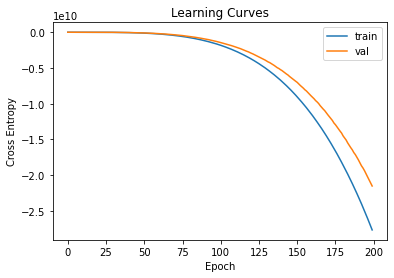

In [8]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(fit_model.history['loss'], label='train')
pyplot.plot(fit_model.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

## Attempt 2

In [9]:
df_modded = df.drop(columns=["Education", "Income"])
df_modded.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0


In [189]:
# Split our preprocessed data into our features and target arrays
y = df_modded["Diabetes_012"].values
X = df_modded.drop(columns="Diabetes_012").values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [190]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [191]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 30
nn2 = tf.keras.models.Sequential()

# First hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn2.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_139 (Dense)            (None, 120)               2400      
_________________________________________________________________
dense_140 (Dense)            (None, 50)                6050      
_________________________________________________________________
dense_141 (Dense)            (None, 30)                1530      
_________________________________________________________________
dense_142 (Dense)            (None, 1)                 31        
Total params: 10,011
Trainable params: 10,011
Non-trainable params: 0
_________________________________________________________________


In [192]:
nn2.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
fit_model = nn2.fit(X_train_scaled, y_train, batch_size=32, epochs=200, callbacks=[callback], validation_split=0.2)

Epoch 1/200
4757/4757 [==============================] - 6s 1ms/step - loss: 0.3972 - accuracy: 0.7166 - val_loss: 0.3947 - val_accuracy: 0.7396
Epoch 2/200
4757/4757 [==============================] - 6s 1ms/step - loss: 0.3931 - accuracy: 0.7242 - val_loss: 0.3931 - val_accuracy: 0.7298
Epoch 3/200
4757/4757 [==============================] - 6s 1ms/step - loss: 0.3921 - accuracy: 0.7244 - val_loss: 0.3919 - val_accuracy: 0.7219
Epoch 4/200
4757/4757 [==============================] - 6s 1ms/step - loss: 0.3913 - accuracy: 0.7211 - val_loss: 0.3918 - val_accuracy: 0.7217
Epoch 5/200
4757/4757 [==============================] - 6s 1ms/step - loss: 0.3906 - accuracy: 0.7232 - val_loss: 0.3918 - val_accuracy: 0.7224
Epoch 6/200
4757/4757 [==============================] - 6s 1ms/step - loss: 0.3900 - accuracy: 0.7240 - val_loss: 0.3912 - val_accuracy: 0.73050s
Epoch 7/200
4757/4757 [==============================] - 6s 1ms/step - loss: 0.3895 - accuracy: 0.7259 - val_loss: 0.3914 - val_

In [193]:
model_loss, model_accuracy = nn2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1982/1982 - 1s - loss: 0.3903 - accuracy: 0.7213
Loss: 0.3903239667415619, Accuracy: 0.7213024497032166


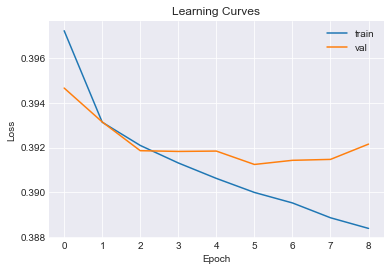

In [194]:
pyplot.style.use('seaborn-darkgrid')
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Loss')
pyplot.plot(fit_model.history['loss'], label='train')
pyplot.plot(fit_model.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

## Attempt 3
### Similar to Attempt 1 but Batch size is larger and different loss.

In [16]:
# Split our preprocessed data into our features and target arrays
y = df["Diabetes_012"].values
X = df.drop(columns="Diabetes_012").values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [17]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 30
nn3 = tf.keras.models.Sequential()

# First hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 120)               2640      
_________________________________________________________________
dense_9 (Dense)              (None, 50)                6050      
_________________________________________________________________
dense_10 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 31        
Total params: 10,251
Trainable params: 10,251
Non-trainable params: 0
_________________________________________________________________


In [18]:
nn3.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
fit_model = nn3.fit(X_train_scaled,y_train, batch_size=32, epochs=200, callbacks=[callback], validation_split=0.2)

Epoch 1/200
4757/4757 [==============================] - 5s 1ms/step - loss: 0.3964 - accuracy: 0.7166 - val_loss: 0.3918 - val_accuracy: 0.7337
Epoch 2/200
4757/4757 [==============================] - 5s 1ms/step - loss: 0.3923 - accuracy: 0.7216 - val_loss: 0.3915 - val_accuracy: 0.7317
Epoch 3/200
4757/4757 [==============================] - 5s 1ms/step - loss: 0.3912 - accuracy: 0.7244 - val_loss: 0.3908 - val_accuracy: 0.7362
Epoch 4/200
4757/4757 [==============================] - 5s 1ms/step - loss: 0.3903 - accuracy: 0.7269 - val_loss: 0.3904 - val_accuracy: 0.7246
Epoch 5/200
4757/4757 [==============================] - 5s 1ms/step - loss: 0.3895 - accuracy: 0.7252 - val_loss: 0.3909 - val_accuracy: 0.7367
Epoch 6/200
4757/4757 [==============================] - 5s 1ms/step - loss: 0.3885 - accuracy: 0.7293 - val_loss: 0.3911 - val_accuracy: 0.7168
Epoch 7/200
4757/4757 [==============================] - 5s 1ms/step - loss: 0.3875 - accuracy: 0.7295 - val_loss: 0.3918 - val_ac

In [19]:
model_loss, model_accuracy = nn3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1982/1982 - 1s - loss: 0.3888 - accuracy: 0.7337
Loss: 0.38884711265563965, Accuracy: 0.7337433099746704


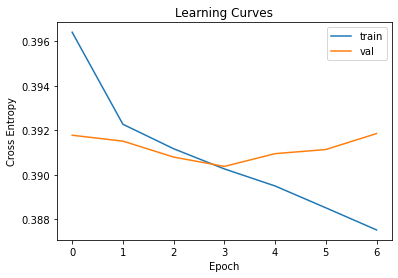

In [20]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(fit_model.history['loss'], label='train')
pyplot.plot(fit_model.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

## Attempt 4
### Kept columns above 0.05 of importance

In [21]:
# Split our preprocessed data into our features and target arrays
y = df["Diabetes_012"].values
X = df.drop(columns=['Diabetes_012', 'BMI', 'Age', 'Income', 'PhysHlth', 'Education', 'GenHlth', 'MentHlth']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [22]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 30
nn4 = tf.keras.models.Sequential()

# First hidden layer
nn4.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn4.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn4.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn4.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 120)               1800      
_________________________________________________________________
dense_13 (Dense)             (None, 50)                6050      
_________________________________________________________________
dense_14 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 31        
Total params: 9,411
Trainable params: 9,411
Non-trainable params: 0
_________________________________________________________________


In [23]:
nn4.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
fit_model = nn4.fit(X_train_scaled,y_train, batch_size = 64, epochs=100, callbacks=[callback], validation_split=0.2)

Epoch 1/100
2379/2379 [==============================] - 3s 1ms/step - loss: 0.4246 - accuracy: 0.7133 - val_loss: 0.4220 - val_accuracy: 0.7242
Epoch 2/100
2379/2379 [==============================] - 3s 1ms/step - loss: 0.4223 - accuracy: 0.7165 - val_loss: 0.4228 - val_accuracy: 0.7088
Epoch 3/100
2379/2379 [==============================] - 3s 1ms/step - loss: 0.4218 - accuracy: 0.7169 - val_loss: 0.4225 - val_accuracy: 0.7238
Epoch 4/100
2379/2379 [==============================] - 3s 1ms/step - loss: 0.4216 - accuracy: 0.7171 - val_loss: 0.4226 - val_accuracy: 0.7066


In [24]:
model_loss, model_accuracy = nn4.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1982/1982 - 1s - loss: 0.4199 - accuracy: 0.7053
Loss: 0.4198639988899231, Accuracy: 0.7053453326225281


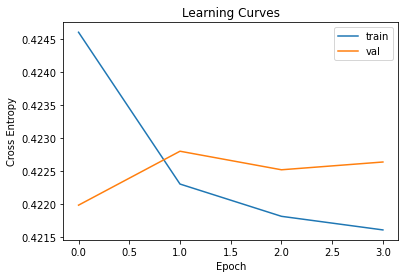

In [25]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(fit_model.history['loss'], label='train')
pyplot.plot(fit_model.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

## Attempt 5
### LeakyReLU

In [26]:
from keras.layers import LeakyReLU

In [27]:
# Split our preprocessed data into our features and target arrays
y = df["Diabetes_012"].values
X = df.drop(columns=['Diabetes_012', 'BMI', 'Age', 'Income', 'PhysHlth', 'Education', 'GenHlth', 'MentHlth']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [28]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 30
nn5 = tf.keras.models.Sequential()

# First hidden layer
nn5.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Second hidden layer
nn5.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Third hidden layer
nn5.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Output layer
nn5.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 120)               1800      
_________________________________________________________________
dense_17 (Dense)             (None, 50)                6050      
_________________________________________________________________
dense_18 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 31        
Total params: 9,411
Trainable params: 9,411
Non-trainable params: 0
_________________________________________________________________


In [29]:
nn5.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
fit_model = nn5.fit(X_train_scaled,y_train, batch_size = 64, epochs=100, callbacks=[callback], validation_split=0.2)

Epoch 1/100
2379/2379 [==============================] - 3s 1ms/step - loss: 0.4244 - accuracy: 0.7149 - val_loss: 0.4251 - val_accuracy: 0.6608
Epoch 2/100
2379/2379 [==============================] - 3s 1ms/step - loss: 0.4224 - accuracy: 0.7179 - val_loss: 0.4228 - val_accuracy: 0.7061
Epoch 3/100
2379/2379 [==============================] - 3s 1ms/step - loss: 0.4220 - accuracy: 0.7185 - val_loss: 0.4233 - val_accuracy: 0.7083
Epoch 4/100
2379/2379 [==============================] - 3s 1ms/step - loss: 0.4218 - accuracy: 0.7196 - val_loss: 0.4224 - val_accuracy: 0.7108
Epoch 5/100
2379/2379 [==============================] - 3s 1ms/step - loss: 0.4214 - accuracy: 0.7190 - val_loss: 0.4225 - val_accuracy: 0.7088
Epoch 6/100
2379/2379 [==============================] - 3s 1ms/step - loss: 0.4213 - accuracy: 0.7176 - val_loss: 0.4222 - val_accuracy: 0.7258
Epoch 7/100
2379/2379 [==============================] - 3s 1ms/step - loss: 0.4211 - accuracy: 0.7186 - val_loss: 0.4233 - val_ac

In [30]:
model_loss, model_accuracy = nn5.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1982/1982 - 1s - loss: 0.4211 - accuracy: 0.7140
Loss: 0.421090304851532, Accuracy: 0.714049220085144


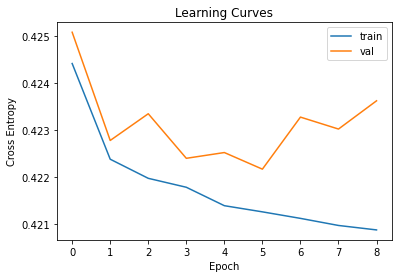

In [31]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(fit_model.history['loss'], label='train')
pyplot.plot(fit_model.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

## Attempt 6
### Batch size decreased. Nodes increased. Keeping 7 most important. LeakyReLU

In [32]:
# Split our preprocessed data into our features and target arrays
y = df["Diabetes_012"].values
X = df.drop(columns=['Diabetes_012', 'BMI', 'Age', 'Income', 'PhysHlth', 'Education', 'GenHlth', 'MentHlth']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [33]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 80
hidden_nodes_layer3 = 40
nn6 = tf.keras.models.Sequential()

# First hidden layer
nn6.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid"))

# Second hidden layer
nn6.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Third hidden layer
nn6.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Output layer
nn6.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 120)               1800      
_________________________________________________________________
dense_21 (Dense)             (None, 80)                9680      
_________________________________________________________________
dense_22 (Dense)             (None, 40)                3240      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 41        
Total params: 14,761
Trainable params: 14,761
Non-trainable params: 0
_________________________________________________________________


In [34]:
nn6.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
fit_model = nn6.fit(X_train_scaled,y_train, batch_size = 16, epochs=100, callbacks=[callback], validation_split=0.2)

Epoch 1/100
9513/9513 [==============================] - 10s 1ms/step - loss: 0.4259 - accuracy: 0.7103 - val_loss: 0.4240 - val_accuracy: 0.7183
Epoch 2/100
9513/9513 [==============================] - 10s 1ms/step - loss: 0.4237 - accuracy: 0.7094 - val_loss: 0.4232 - val_accuracy: 0.6880
Epoch 3/100
9513/9513 [==============================] - 10s 1ms/step - loss: 0.4229 - accuracy: 0.7084 - val_loss: 0.4238 - val_accuracy: 0.7246
Epoch 4/100
9513/9513 [==============================] - 10s 1ms/step - loss: 0.4227 - accuracy: 0.7122 - val_loss: 0.4233 - val_accuracy: 0.6668 - accura
Epoch 5/100
9513/9513 [==============================] - 10s 1ms/step - loss: 0.4225 - accuracy: 0.7110 - val_loss: 0.4223 - val_accuracy: 0.7097
Epoch 6/100
9513/9513 [==============================] - 10s 1ms/step - loss: 0.4224 - accuracy: 0.7117 - val_loss: 0.4222 - val_accuracy: 0.7079
Epoch 7/100
9513/9513 [==============================] - 10s 1ms/step - loss: 0.4221 - accuracy: 0.7136 - val_loss:

In [35]:
model_loss, model_accuracy = nn6.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1982/1982 - 1s - loss: 0.4193 - accuracy: 0.7139
Loss: 0.41927579045295715, Accuracy: 0.7138915061950684


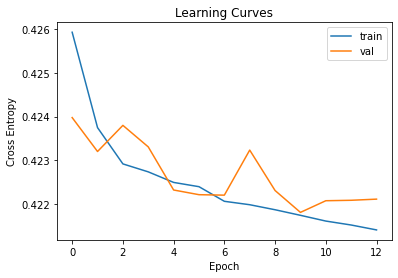

In [36]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(fit_model.history['loss'], label='train')
pyplot.plot(fit_model.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

## Attempt 7
### Removing pre diabetes. Batch default. Keeping all the columns. Similar to Attempt 2

In [195]:
df_no_pre = df[df["Diabetes_012"] != 1]
df_no_pre.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Income,MentalHealth,PhysicalHealth
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,1.0,0.0,9.0,4.0,3.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,7.0,6.0,1.0,1.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,1.0,0.0,9.0,4.0,8.0,6.0,6.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,11.0,3.0,6.0,1.0,1.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,11.0,5.0,4.0,1.0,1.0


In [196]:
# Split our preprocessed data into our features and target arrays
y = df_no_pre["Diabetes_012"].values
X = df_no_pre.drop(columns=['Diabetes_012']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [197]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 30
nn7 = tf.keras.models.Sequential()

# First hidden layer
nn7.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Second hidden layer
nn7.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Third hidden layer
nn7.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Output layer
nn7.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn7.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_143 (Dense)            (None, 120)               2640      
_________________________________________________________________
dense_144 (Dense)            (None, 50)                6050      
_________________________________________________________________
dense_145 (Dense)            (None, 30)                1530      
_________________________________________________________________
dense_146 (Dense)            (None, 1)                 31        
Total params: 10,251
Trainable params: 10,251
Non-trainable params: 0
_________________________________________________________________


In [198]:
nn7.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
fit_model = nn7.fit(X_train_scaled,y_train, batch_size = 32, epochs=100, callbacks=[callback], validation_split=0.2)

Epoch 1/100
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3925 - accuracy: 0.7313 - val_loss: 0.3993 - val_accuracy: 0.7236
Epoch 2/100
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3885 - accuracy: 0.7391 - val_loss: 0.4005 - val_accuracy: 0.7429
Epoch 3/100
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3873 - accuracy: 0.7412 - val_loss: 0.4008 - val_accuracy: 0.7338
Epoch 4/100
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3865 - accuracy: 0.7424 - val_loss: 0.4003 - val_accuracy: 0.7440


In [199]:
model_loss, model_accuracy = nn7.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1946/1946 - 1s - loss: 0.3945 - accuracy: 0.7477
Loss: 0.3944607079029083, Accuracy: 0.7476992607116699


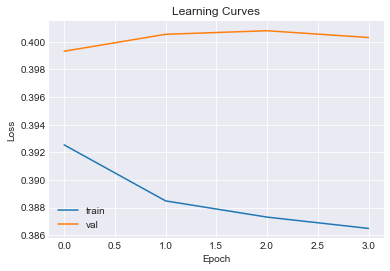

In [200]:
pyplot.style.use('seaborn-darkgrid')
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Loss')
pyplot.plot(fit_model.history['loss'], label='train')
pyplot.plot(fit_model.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

## Attempt 8

In [43]:
df_no_pre = df[df["Diabetes_012"] != 1]
df_no_pre.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [44]:
# Split our preprocessed data into our features and target arrays
y = df_no_pre["Diabetes_012"].values
X = df_no_pre.drop(columns=['Diabetes_012']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [45]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 30
nn8 = tf.keras.models.Sequential()

# First hidden layer
nn8.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Second hidden layer
nn8.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Third hidden layer
nn8.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Output layer
nn8.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn8.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 120)               2640      
_________________________________________________________________
dense_29 (Dense)             (None, 50)                6050      
_________________________________________________________________
dense_30 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 31        
Total params: 10,251
Trainable params: 10,251
Non-trainable params: 0
_________________________________________________________________


In [46]:
nn8.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
fit_model = nn8.fit(X_train_scaled,y_train, batch_size = 32, epochs=200, callbacks=[callback], validation_split=0.2)

Epoch 1/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3925 - accuracy: 0.7303 - val_loss: 0.4002 - val_accuracy: 0.7426
Epoch 2/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3887 - accuracy: 0.7393 - val_loss: 0.4008 - val_accuracy: 0.7197
Epoch 3/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3875 - accuracy: 0.7397 - val_loss: 0.3992 - val_accuracy: 0.7273
Epoch 4/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3866 - accuracy: 0.7412 - val_loss: 0.3997 - val_accuracy: 0.7361
Epoch 5/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3860 - accuracy: 0.7398 - val_loss: 0.4009 - val_accuracy: 0.7428
Epoch 6/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3855 - accuracy: 0.7431 - val_loss: 0.3994 - val_accuracy: 0.7354


In [47]:
model_loss, model_accuracy = nn8.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1946/1946 - 1s - loss: 0.3938 - accuracy: 0.7390
Loss: 0.39379897713661194, Accuracy: 0.7389621734619141


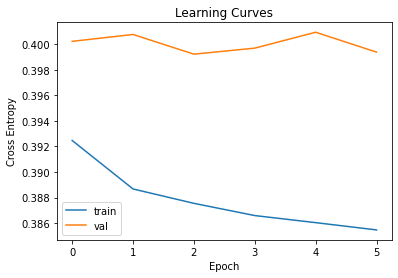

In [48]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(fit_model.history['loss'], label='train')
pyplot.plot(fit_model.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

## Attempt 9

In [49]:
df_no_pre = df[df["Diabetes_012"] != 1]
df_no_pre.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [50]:
# Split our preprocessed data into our features and target arrays
y = df_no_pre["Diabetes_012"].values
X = df_no_pre.drop(columns=['Diabetes_012']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [51]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 30
nn9 = tf.keras.models.Sequential()

# First hidden layer
nn9.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Second hidden layer
nn9.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Third hidden layer
nn9.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Output layer
nn9.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn9.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 120)               2640      
_________________________________________________________________
dense_33 (Dense)             (None, 50)                6050      
_________________________________________________________________
dense_34 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 31        
Total params: 10,251
Trainable params: 10,251
Non-trainable params: 0
_________________________________________________________________


In [52]:
nn9.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
fit_model = nn9.fit(X_train_scaled,y_train, batch_size = 16, epochs=200, callbacks=[callback], validation_split=0.2)

Epoch 1/200
9340/9340 [==============================] - 10s 1ms/step - loss: 0.3925 - accuracy: 0.7379 - val_loss: 0.3995 - val_accuracy: 0.7329
Epoch 2/200
9340/9340 [==============================] - 10s 1ms/step - loss: 0.3888 - accuracy: 0.7417 - val_loss: 0.3999 - val_accuracy: 0.7223
Epoch 3/200
9340/9340 [==============================] - 10s 1ms/step - loss: 0.3877 - accuracy: 0.7408 - val_loss: 0.3997 - val_accuracy: 0.7231
Epoch 4/200
9340/9340 [==============================] - 10s 1ms/step - loss: 0.3869 - accuracy: 0.7415 - val_loss: 0.3986 - val_accuracy: 0.7402
Epoch 5/200
9340/9340 [==============================] - 10s 1ms/step - loss: 0.3864 - accuracy: 0.7411 - val_loss: 0.3994 - val_accuracy: 0.7297
Epoch 6/200
9340/9340 [==============================] - 10s 1ms/step - loss: 0.3858 - accuracy: 0.7428 - val_loss: 0.3989 - val_accuracy: 0.7302
Epoch 7/200
9340/9340 [==============================] - 10s 1ms/step - loss: 0.3852 - accuracy: 0.7415 - val_loss: 0.3983 -

In [53]:
model_loss, model_accuracy = nn8.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1946/1946 - 1s - loss: 0.3938 - accuracy: 0.7390
Loss: 0.39379897713661194, Accuracy: 0.7389621734619141


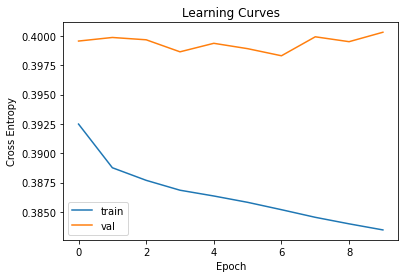

In [54]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(fit_model.history['loss'], label='train')
pyplot.plot(fit_model.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

## Attempt 10

In [55]:
# Split our preprocessed data into our features and target arrays
y = df_no_pre["Diabetes_012"].values
X = df_no_pre.drop(columns=['Diabetes_012']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [56]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 30
nn10 = tf.keras.models.Sequential()

# First hidden layer
nn10.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Second hidden layer
nn10.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Third hidden layer
nn10.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Output layer
nn10.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn10.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 120)               2640      
_________________________________________________________________
dense_37 (Dense)             (None, 50)                6050      
_________________________________________________________________
dense_38 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 31        
Total params: 10,251
Trainable params: 10,251
Non-trainable params: 0
_________________________________________________________________


In [57]:
nn10.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
fit_model = nn10.fit(X_train_scaled,y_train, batch_size = 8, epochs=200, callbacks=[callback], validation_split=0.2)

Epoch 1/200
18679/18679 [==============================] - 19s 1ms/step - loss: 0.3928 - accuracy: 0.7373 - val_loss: 0.4002 - val_accuracy: 0.7245
Epoch 2/200
18679/18679 [==============================] - 19s 1ms/step - loss: 0.3889 - accuracy: 0.7415 - val_loss: 0.4012 - val_accuracy: 0.7579
Epoch 3/200
18679/18679 [==============================] - 19s 1ms/step - loss: 0.3879 - accuracy: 0.7430 - val_loss: 0.4001 - val_accuracy: 0.7355
Epoch 4/200
18679/18679 [==============================] - 19s 1ms/step - loss: 0.3873 - accuracy: 0.7445 - val_loss: 0.3991 - val_accuracy: 0.7457
Epoch 5/200
18679/18679 [==============================] - 19s 1ms/step - loss: 0.3867 - accuracy: 0.7463 - val_loss: 0.3993 - val_accuracy: 0.7353
Epoch 6/200
18679/18679 [==============================] - 19s 1ms/step - loss: 0.3862 - accuracy: 0.7472 - val_loss: 0.3991 - val_accuracy: 0.7389
Epoch 7/200
18679/18679 [==============================] - 19s 1ms/step - loss: 0.3860 - accuracy: 0.7467 - val_

In [58]:
model_loss, model_accuracy = nn8.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1946/1946 - 1s - loss: 0.3938 - accuracy: 0.7390
Loss: 0.39379897713661194, Accuracy: 0.7389621734619141


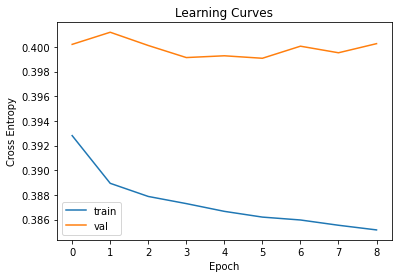

In [59]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(fit_model.history['loss'], label='train')
pyplot.plot(fit_model.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

## Finding Columns to adjust to potentially improve training

In [60]:
df_no_pre.nunique(axis=0)

Diabetes_012             2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     83
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [61]:
df_no_pre["MentHlth"].value_counts().sort_index(ascending=False)

30.0     11727
29.0       155
28.0       320
27.0        78
26.0        42
25.0      1155
24.0        31
23.0        36
22.0        61
21.0       218
20.0      3287
19.0        16
18.0        93
17.0        53
16.0        87
15.0      5372
14.0      1135
13.0        41
12.0       388
11.0        39
10.0      6234
9.0         82
8.0        626
7.0       3037
6.0        960
5.0       8849
4.0       3706
3.0       7256
2.0      12823
1.0       8418
0.0     172724
Name: MentHlth, dtype: int64

In [62]:
min_value = df_no_pre['MentHlth'].min()
max_value = df_no_pre['MentHlth'].max()
bins = np.linspace(min_value,max_value,7)
labels = [1, 2, 3, 4, 5, 6]
df_no_pre['MentalHealth'] = pd.cut(df_no_pre['MentHlth'], bins=bins, labels=labels, include_lowest=True)
df_no_pre = df_no_pre.drop(columns=['MentHlth'])
df_no_pre.head()

C:\Users\cabon\AppData\Local\Temp/ipykernel_17764/1883573589.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_pre['MentalHealth'] = pd.cut(df_no_pre['MentHlth'], bins=bins, labels=labels, include_lowest=True)


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,MentalHealth
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,15.0,1.0,0.0,9.0,4.0,3.0,4
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,7.0,6.0,1.0,1
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,1.0,0.0,9.0,4.0,8.0,6
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,11.0,3.0,6.0,1
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,11.0,5.0,4.0,1


In [63]:
df_no_pre["PhysHlth"].value_counts().sort_index(ascending=False)

30.0     18842
29.0       208
28.0       506
27.0        96
26.0        65
25.0      1300
24.0        69
23.0        53
22.0        66
21.0       645
20.0      3194
19.0        20
18.0       148
17.0        93
16.0       109
15.0      4775
14.0      2525
13.0        61
12.0       559
11.0        57
10.0      5425
9.0        174
8.0        788
7.0       4448
6.0       1292
5.0       7454
4.0       4444
3.0       8322
2.0      14516
1.0      11214
0.0     157581
Name: PhysHlth, dtype: int64

In [64]:
min_value = df_no_pre['PhysHlth'].min()
max_value = df_no_pre['PhysHlth'].max()
bins = np.linspace(min_value,max_value,7)
labels = [1, 2, 3, 4, 5, 6]
df_no_pre['PhysicalHealth'] = pd.cut(df_no_pre['PhysHlth'], bins=bins, labels=labels, include_lowest=True)
df_no_pre = df_no_pre.drop(columns=['PhysHlth'])
df_no_pre.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Income,MentalHealth,PhysicalHealth
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,1.0,0.0,9.0,4.0,3.0,4,3
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,7.0,6.0,1.0,1,1
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,1.0,0.0,9.0,4.0,8.0,6,6
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,11.0,3.0,6.0,1,1
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,11.0,5.0,4.0,1,1


## Attempt 11

In [65]:
# Split our preprocessed data into our features and target arrays
y = df_no_pre["Diabetes_012"].values
X = df_no_pre.drop(columns=['Diabetes_012']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [66]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 30
nn11 = tf.keras.models.Sequential()

# First hidden layer
nn11.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Second hidden layer
nn11.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Dropout
#nn11.add(tf.keras.layers.Dense(5, input_dim=5, kernel_initializer='ones', kernel_regularizer=tf.keras.regularizers.L1(0.01),
 #   activity_regularizer=tf.keras.regularizers.L2(0.01)))

# Third hidden layer
nn11.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Output layer
nn11.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn11.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 120)               2640      
_________________________________________________________________
dense_41 (Dense)             (None, 30)                3630      
_________________________________________________________________
dense_42 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 31        
Total params: 7,231
Trainable params: 7,231
Non-trainable params: 0
_________________________________________________________________


In [67]:
nn11.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
fit_model = nn11.fit(X_train_scaled,y_train, batch_size = 32, epochs=200, callbacks=[callback], validation_split=0.2)

Epoch 1/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.4006 - accuracy: 0.7282 - val_loss: 0.4023 - val_accuracy: 0.7181
Epoch 2/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3900 - accuracy: 0.7242 - val_loss: 0.4003 - val_accuracy: 0.7188
Epoch 3/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3886 - accuracy: 0.7272 - val_loss: 0.3997 - val_accuracy: 0.7170
Epoch 4/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3877 - accuracy: 0.7276 - val_loss: 0.3992 - val_accuracy: 0.7251
Epoch 5/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3870 - accuracy: 0.7287 - val_loss: 0.3991 - val_accuracy: 0.7252
Epoch 6/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3866 - accuracy: 0.7300 - val_loss: 0.3992 - val_accuracy: 0.7315
Epoch 7/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3862 - accuracy: 0.7306 - val_loss: 0.3991 - val_ac

In [68]:
model_loss, model_accuracy = nn11.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1946/1946 - 1s - loss: 0.3942 - accuracy: 0.7152
Loss: 0.39424484968185425, Accuracy: 0.7151920199394226


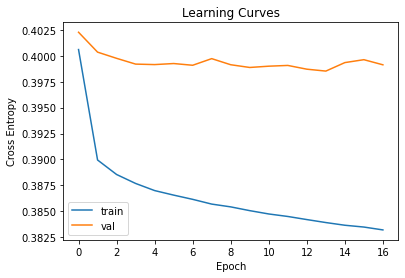

In [69]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(fit_model.history['loss'], label='train')
pyplot.plot(fit_model.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

## Attempt 12
### With all diabete choices but with leaky relu

In [70]:
df_dumb = df.copy()
min_value = df_dumb['MentHlth'].min()
max_value = df_dumb['MentHlth'].max()
bins = np.linspace(min_value,max_value,7)
labels = ["1-5", "6-10", "11-15", "16-20", "21-25", "26-30"]
df_dumb['MentalHealth'] = pd.cut(df_dumb['MentHlth'], bins=bins, labels=labels, include_lowest=True)
df_dumb = df_dumb.drop(columns=['MentHlth'])
df_dumb.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,MentalHealth
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,15.0,1.0,0.0,9.0,4.0,3.0,16-20
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,7.0,6.0,1.0,1-5
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,1.0,0.0,9.0,4.0,8.0,26-30
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,11.0,3.0,6.0,1-5
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,11.0,5.0,4.0,1-5


In [71]:
min_value = df_dumb['PhysHlth'].min()
max_value = df_dumb['PhysHlth'].max()
bins = np.linspace(min_value,max_value,7)
labels = ["1-5", "6-10", "11-15", "16-20", "21-25", "26-30"]
df_dumb['PhysicalHealth'] = pd.cut(df_dumb['PhysHlth'], bins=bins, labels=labels, include_lowest=True)
df_dumb = df_dumb.drop(columns=['PhysHlth'])
df_dumb.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Income,MentalHealth,PhysicalHealth
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,1.0,0.0,9.0,4.0,3.0,16-20,11-15
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,7.0,6.0,1.0,1-5,1-5
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,1.0,0.0,9.0,4.0,8.0,26-30,26-30
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,11.0,3.0,6.0,1-5,1-5
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,11.0,5.0,4.0,1-5,1-5


In [72]:
df_dummies = pd.get_dummies(df_dumb)
df_dummies.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentalHealth_11-15,MentalHealth_16-20,MentalHealth_21-25,MentalHealth_26-30,PhysicalHealth_1-5,PhysicalHealth_6-10,PhysicalHealth_11-15,PhysicalHealth_16-20,PhysicalHealth_21-25,PhysicalHealth_26-30
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,1,0,0,0,0,0,1
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,0


In [73]:
# Split our preprocessed data into our features and target arrays
y = df_dummies["Diabetes_012"].values
X = df_dummies.drop(columns="Diabetes_012").values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [74]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 30
nn12 = tf.keras.models.Sequential()

# First hidden layer
nn12.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Second hidden layer
nn12.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Third hidden layer
nn12.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Output layer
nn12.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn12.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 120)               3840      
_________________________________________________________________
dense_45 (Dense)             (None, 50)                6050      
_________________________________________________________________
dense_46 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 31        
Total params: 11,451
Trainable params: 11,451
Non-trainable params: 0
_________________________________________________________________


In [75]:
nn12.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
fit_model = nn12.fit(X_train_scaled,y_train, batch_size=32, epochs=200, callbacks=[callback], validation_split=0.2)

Epoch 1/200
4757/4757 [==============================] - 6s 1ms/step - loss: 0.3975 - accuracy: 0.7177 - val_loss: 0.3938 - val_accuracy: 0.7169
Epoch 2/200
4757/4757 [==============================] - 6s 1ms/step - loss: 0.3929 - accuracy: 0.7288 - val_loss: 0.3927 - val_accuracy: 0.7191
Epoch 3/200
4757/4757 [==============================] - 6s 1ms/step - loss: 0.3917 - accuracy: 0.7297 - val_loss: 0.3916 - val_accuracy: 0.7274
Epoch 4/200
4757/4757 [==============================] - 5s 1ms/step - loss: 0.3906 - accuracy: 0.7281 - val_loss: 0.3919 - val_accuracy: 0.7382
Epoch 5/200
4757/4757 [==============================] - 5s 1ms/step - loss: 0.3899 - accuracy: 0.7321 - val_loss: 0.3914 - val_accuracy: 0.7324
Epoch 6/200
4757/4757 [==============================] - 5s 1ms/step - loss: 0.3887 - accuracy: 0.7335 - val_loss: 0.3915 - val_accuracy: 0.7466
Epoch 7/200
4757/4757 [==============================] - 5s 1ms/step - loss: 0.3882 - accuracy: 0.7348 - val_loss: 0.3918 - val_ac

In [76]:
model_loss, model_accuracy = nn12.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1982/1982 - 1s - loss: 0.3894 - accuracy: 0.7329
Loss: 0.3893689513206482, Accuracy: 0.7329391241073608


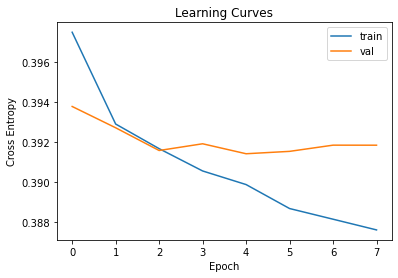

In [77]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(fit_model.history['loss'], label='train')
pyplot.plot(fit_model.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

## Attempt 13

In [78]:
min_value = df['MentHlth'].min()
max_value = df['MentHlth'].max()
bins = np.linspace(min_value,max_value,7)
labels = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
df['MentalHealth'] = pd.cut(df['MentHlth'], bins=bins, labels=labels, include_lowest=True)
df = df.drop(columns=['MentHlth'])
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,MentalHealth
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,15.0,1.0,0.0,9.0,4.0,3.0,4.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,7.0,6.0,1.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,1.0,0.0,9.0,4.0,8.0,6.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,11.0,3.0,6.0,1.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,11.0,5.0,4.0,1.0


In [79]:
min_value = df['PhysHlth'].min()
max_value = df['PhysHlth'].max()
bins = np.linspace(min_value,max_value,7)
labels = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
df['PhysicalHealth'] = pd.cut(df['PhysHlth'], bins=bins, labels=labels, include_lowest=True)
df = df.drop(columns=['PhysHlth'])
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Income,MentalHealth,PhysicalHealth
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,1.0,0.0,9.0,4.0,3.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,7.0,6.0,1.0,1.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,1.0,0.0,9.0,4.0,8.0,6.0,6.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,11.0,3.0,6.0,1.0,1.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,11.0,5.0,4.0,1.0,1.0


In [80]:
# Split our preprocessed data into our features and target arrays
y = df["Diabetes_012"].values
X = df.drop(columns="Diabetes_012").values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [81]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 30
nn13 = tf.keras.models.Sequential()

# First hidden layer
nn13.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Second hidden layer
nn13.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Third hidden layer
nn13.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Output layer
nn13.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn13.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 120)               2640      
_________________________________________________________________
dense_49 (Dense)             (None, 50)                6050      
_________________________________________________________________
dense_50 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 31        
Total params: 10,251
Trainable params: 10,251
Non-trainable params: 0
_________________________________________________________________


In [82]:
nn13.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
fit_model = nn13.fit(X_train_scaled,y_train, batch_size=32, epochs=200, callbacks=[callback], validation_split=0.2)

Epoch 1/200
4757/4757 [==============================] - 6s 1ms/step - loss: 0.3964 - accuracy: 0.7175 - val_loss: 0.3925 - val_accuracy: 0.7180
Epoch 2/200
4757/4757 [==============================] - 5s 1ms/step - loss: 0.3926 - accuracy: 0.7263 - val_loss: 0.3920 - val_accuracy: 0.7364
Epoch 3/200
4757/4757 [==============================] - 5s 1ms/step - loss: 0.3914 - accuracy: 0.7298 - val_loss: 0.3913 - val_accuracy: 0.7288
Epoch 4/200
4757/4757 [==============================] - 5s 1ms/step - loss: 0.3906 - accuracy: 0.7293 - val_loss: 0.3918 - val_accuracy: 0.7249
Epoch 5/200
4757/4757 [==============================] - 5s 1ms/step - loss: 0.3899 - accuracy: 0.7308 - val_loss: 0.3911 - val_accuracy: 0.7328
Epoch 6/200
4757/4757 [==============================] - 5s 1ms/step - loss: 0.3893 - accuracy: 0.7312 - val_loss: 0.3933 - val_accuracy: 0.7236
Epoch 7/200
4757/4757 [==============================] - 5s 1ms/step - loss: 0.3889 - accuracy: 0.7295 - val_loss: 0.3908 - val_ac

In [83]:
model_loss, model_accuracy = nn13.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1982/1982 - 1s - loss: 0.3890 - accuracy: 0.7213
Loss: 0.3889866769313812, Accuracy: 0.7213181853294373


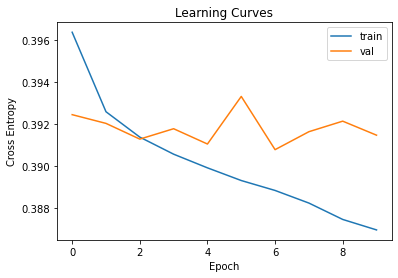

In [84]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(fit_model.history['loss'], label='train')
pyplot.plot(fit_model.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

## Attempt 14
### Attempted to further improve Attempt 11

In [85]:
# Split our preprocessed data into our features and target arrays
y = df_no_pre["Diabetes_012"].values
X = df_no_pre.drop(columns=['Diabetes_012']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [86]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 140
hidden_nodes_layer2 = 100
hidden_nodes_layer3 = 80
hidden_nodes_layer3 = 60
nn14 = tf.keras.models.Sequential()

# First hidden layer
nn14.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Second hidden layer
nn14.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Third hidden layer
nn14.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Fourth hidden layer
nn14.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Output layer
nn14.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn14.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 140)               3080      
_________________________________________________________________
dense_53 (Dense)             (None, 100)               14100     
_________________________________________________________________
dense_54 (Dense)             (None, 60)                6060      
_________________________________________________________________
dense_55 (Dense)             (None, 60)                3660      
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 61        
Total params: 26,961
Trainable params: 26,961
Non-trainable params: 0
_________________________________________________________________


In [87]:
nn14.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
fit_model = nn14.fit(X_train_scaled,y_train, batch_size = 32, epochs=200, callbacks=[callback], validation_split=0.2)

Epoch 1/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3930 - accuracy: 0.7311 - val_loss: 0.4036 - val_accuracy: 0.7632
Epoch 2/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3889 - accuracy: 0.7400 - val_loss: 0.3995 - val_accuracy: 0.7190
Epoch 3/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3878 - accuracy: 0.7400 - val_loss: 0.3994 - val_accuracy: 0.7252
Epoch 4/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3871 - accuracy: 0.7399 - val_loss: 0.3987 - val_accuracy: 0.7386
Epoch 5/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3863 - accuracy: 0.7437 - val_loss: 0.3998 - val_accuracy: 0.7407
Epoch 6/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3857 - accuracy: 0.7436 - val_loss: 0.3990 - val_accuracy: 0.7295


In [88]:
model_loss, model_accuracy = nn14.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1946/1946 - 1s - loss: 0.3935 - accuracy: 0.7336
Loss: 0.3935058116912842, Accuracy: 0.7335978150367737


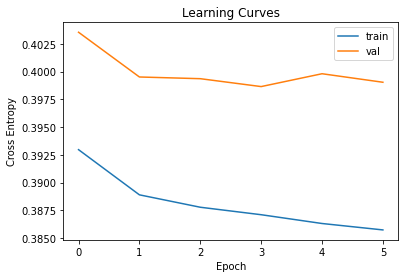

In [89]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(fit_model.history['loss'], label='train')
pyplot.plot(fit_model.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

## Attempt 15
### Try improving previous

In [90]:
# Split our preprocessed data into our features and target arrays
y = df_no_pre["Diabetes_012"].values
X = df_no_pre.drop(columns=['Diabetes_012']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [91]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 140
hidden_nodes_layer2 = 100
hidden_nodes_layer3 = 80
hidden_nodes_layer4 = 60
nn15 = tf.keras.models.Sequential()

# First hidden layer
nn15.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn15.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn15.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Fourth hidden layer
nn15.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn15.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn15.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 140)               3080      
_________________________________________________________________
dense_58 (Dense)             (None, 100)               14100     
_________________________________________________________________
dense_59 (Dense)             (None, 80)                8080      
_________________________________________________________________
dense_60 (Dense)             (None, 60)                4860      
_________________________________________________________________
dense_61 (Dense)             (None, 1)                 61        
Total params: 30,181
Trainable params: 30,181
Non-trainable params: 0
_________________________________________________________________


In [92]:
nn15.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
fit_model = nn15.fit(X_train_scaled,y_train, batch_size = 32, epochs=200, callbacks=[callback], validation_split=0.2)

Epoch 1/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3929 - accuracy: 0.7345 - val_loss: 0.3998 - val_accuracy: 0.7187
Epoch 2/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3889 - accuracy: 0.7385 - val_loss: 0.3993 - val_accuracy: 0.7196
Epoch 3/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3877 - accuracy: 0.7423 - val_loss: 0.4025 - val_accuracy: 0.7156
Epoch 4/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3868 - accuracy: 0.7403 - val_loss: 0.3992 - val_accuracy: 0.7292
Epoch 5/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3863 - accuracy: 0.7407 - val_loss: 0.3996 - val_accuracy: 0.7424
Epoch 6/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3854 - accuracy: 0.7397 - val_loss: 0.3991 - val_accuracy: 0.7404
Epoch 7/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3843 - accuracy: 0.7436 - val_loss: 0.3997 - val_ac

In [93]:
model_loss, model_accuracy = nn15.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1946/1946 - 1s - loss: 0.3947 - accuracy: 0.7405
Loss: 0.3947449326515198, Accuracy: 0.740536093711853


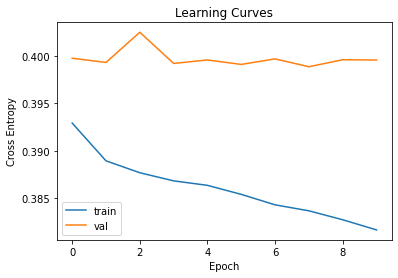

In [94]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(fit_model.history['loss'], label='train')
pyplot.plot(fit_model.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

## Attempt 16
### Similar to 8

In [95]:
df_no_pre2 = df[df["Diabetes_012"] != 1]
df_no_pre2.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Income,MentalHealth,PhysicalHealth
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,1.0,0.0,9.0,4.0,3.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,7.0,6.0,1.0,1.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,1.0,0.0,9.0,4.0,8.0,6.0,6.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,11.0,3.0,6.0,1.0,1.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,11.0,5.0,4.0,1.0,1.0


In [96]:
# Split our preprocessed data into our features and target arrays
y = df_no_pre2["Diabetes_012"].values
X = df_no_pre2.drop(columns=['Diabetes_012']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [97]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 140
hidden_nodes_layer2 = 120
hidden_nodes_layer3 = 100
hidden_nodes_layer4 = 80
nn16 = tf.keras.models.Sequential()

# First hidden layer
nn16.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn16.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn16.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Fourth hidden layer
nn16.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn16.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn16.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 140)               3080      
_________________________________________________________________
dense_63 (Dense)             (None, 120)               16920     
_________________________________________________________________
dense_64 (Dense)             (None, 100)               12100     
_________________________________________________________________
dense_65 (Dense)             (None, 80)                8080      
_________________________________________________________________
dense_66 (Dense)             (None, 1)                 81        
Total params: 40,261
Trainable params: 40,261
Non-trainable params: 0
_________________________________________________________________


In [98]:
nn16.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
fit_model = nn16.fit(X_train_scaled,y_train, batch_size = 32, epochs=200, callbacks=[callback], validation_split=0.2)

Epoch 1/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3928 - accuracy: 0.7344 - val_loss: 0.4006 - val_accuracy: 0.7234
Epoch 2/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3885 - accuracy: 0.7417 - val_loss: 0.3994 - val_accuracy: 0.7317
Epoch 3/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3876 - accuracy: 0.7455 - val_loss: 0.3992 - val_accuracy: 0.7451
Epoch 4/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3865 - accuracy: 0.7424 - val_loss: 0.3988 - val_accuracy: 0.7368
Epoch 5/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3858 - accuracy: 0.7470 - val_loss: 0.3987 - val_accuracy: 0.7325
Epoch 6/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3851 - accuracy: 0.7477 - val_loss: 0.3992 - val_accuracy: 0.7221
Epoch 7/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3842 - accuracy: 0.7467 - val_loss: 0.3996 - val_ac

In [99]:
model_loss, model_accuracy = nn16.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1946/1946 - 1s - loss: 0.3954 - accuracy: 0.7290
Loss: 0.3953542709350586, Accuracy: 0.7289722561836243


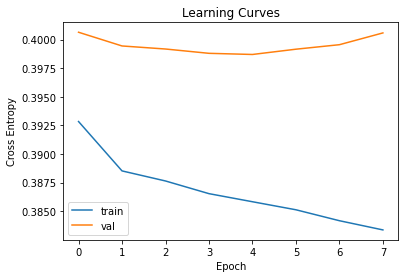

In [100]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(fit_model.history['loss'], label='train')
pyplot.plot(fit_model.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [101]:
# Done on a previous model that obtained 0.76 accuracy before extra runs
#nn16.save('../Models/diabetes_02_model')

## Attempt 17

In [102]:
# Split our preprocessed data into our features and target arrays
y = df_no_pre2["Diabetes_012"].values
X = df_no_pre2.drop(columns=['Diabetes_012']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [103]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 160
hidden_nodes_layer2 = 140
hidden_nodes_layer3 = 120
hidden_nodes_layer4 = 100
nn17 = tf.keras.models.Sequential()

# First hidden layer
nn17.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn17.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn17.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Fourth hidden layer
nn17.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="sigmoid"))

# Output layer
nn17.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn17.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 160)               3520      
_________________________________________________________________
dense_68 (Dense)             (None, 140)               22540     
_________________________________________________________________
dense_69 (Dense)             (None, 120)               16920     
_________________________________________________________________
dense_70 (Dense)             (None, 100)               12100     
_________________________________________________________________
dense_71 (Dense)             (None, 1)                 101       
Total params: 55,181
Trainable params: 55,181
Non-trainable params: 0
_________________________________________________________________


In [104]:
nn17.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
fit_model = nn17.fit(X_train_scaled,y_train, batch_size = 32, epochs=200, callbacks=[callback], validation_split=0.2)

Epoch 1/200
4670/4670 [==============================] - 7s 1ms/step - loss: 0.3972 - accuracy: 0.7244 - val_loss: 0.4011 - val_accuracy: 0.7275
Epoch 2/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3888 - accuracy: 0.7278 - val_loss: 0.4003 - val_accuracy: 0.7371
Epoch 3/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3872 - accuracy: 0.7317 - val_loss: 0.3995 - val_accuracy: 0.7108
Epoch 4/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3862 - accuracy: 0.7337 - val_loss: 0.3997 - val_accuracy: 0.7347
Epoch 5/200
4670/4670 [==============================] - 7s 1ms/step - loss: 0.3852 - accuracy: 0.7357 - val_loss: 0.3997 - val_accuracy: 0.7098
Epoch 6/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3843 - accuracy: 0.7371 - val_loss: 0.3998 - val_accuracy: 0.7412


In [105]:
model_loss, model_accuracy = nn17.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1946/1946 - 1s - loss: 0.3943 - accuracy: 0.7440
Loss: 0.3943403959274292, Accuracy: 0.7439731359481812


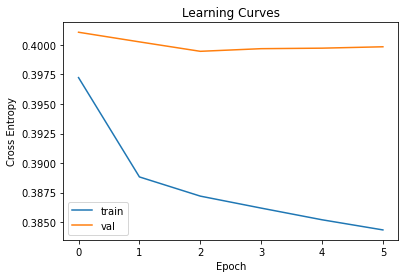

In [106]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(fit_model.history['loss'], label='train')
pyplot.plot(fit_model.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

## Attempt 18
### Similar to 16

In [107]:
# Split our preprocessed data into our features and target arrays
y = df_no_pre2["Diabetes_012"].values
X = df_no_pre2.drop(columns=['Diabetes_012']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [108]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 70
hidden_nodes_layer2 = 20
hidden_nodes_layer3 = 20
hidden_nodes_layer4 = 10
nn18 = tf.keras.models.Sequential()

# First hidden layer
nn18.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn18.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Dropout
nn18.add(tf.keras.layers.Dense(5, input_dim=5, kernel_initializer='ones', kernel_regularizer=tf.keras.regularizers.L1(0.01),
    activity_regularizer=tf.keras.regularizers.L2(0.01)))

# Third hidden layer
nn18.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Dropout
nn18.add(tf.keras.layers.Dense(5, input_dim=5, kernel_initializer='ones', kernel_regularizer=tf.keras.regularizers.L1(0.01),
    activity_regularizer=tf.keras.regularizers.L2(0.01)))

# Fourth hidden layer
nn18.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn18.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn18.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 70)                1540      
_________________________________________________________________
dense_73 (Dense)             (None, 20)                1420      
_________________________________________________________________
dense_74 (Dense)             (None, 5)                 105       
_________________________________________________________________
dense_75 (Dense)             (None, 20)                120       
_________________________________________________________________
dense_76 (Dense)             (None, 5)                 105       
_________________________________________________________________
dense_77 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_78 (Dense)             (None, 1)               

In [109]:
nn18.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
fit_model = nn18.fit(X_train_scaled,y_train, batch_size = 32, epochs=200, callbacks=[callback], validation_split=0.2)

Epoch 1/200
4670/4670 [==============================] - 6s 1ms/step - loss: 7.7510 - accuracy: 0.0272 - val_loss: 2.9800 - val_accuracy: 0.1737
Epoch 2/200
4670/4670 [==============================] - 6s 1ms/step - loss: 2.5840 - accuracy: 0.6715 - val_loss: 2.4268 - val_accuracy: 0.8544
Epoch 3/200
4670/4670 [==============================] - 6s 1ms/step - loss: 2.3519 - accuracy: 0.8593 - val_loss: 2.3070 - val_accuracy: 0.8544
Epoch 4/200
4670/4670 [==============================] - 6s 1ms/step - loss: 2.2437 - accuracy: 0.8593 - val_loss: 2.2050 - val_accuracy: 0.8544
Epoch 5/200
4670/4670 [==============================] - 6s 1ms/step - loss: 2.1432 - accuracy: 0.8593 - val_loss: 2.1073 - val_accuracy: 0.8544
Epoch 6/200
4670/4670 [==============================] - 6s 1ms/step - loss: 2.0462 - accuracy: 0.8593 - val_loss: 2.0115 - val_accuracy: 0.8544
Epoch 7/200
4670/4670 [==============================] - 6s 1ms/step - loss: 1.9501 - accuracy: 0.8593 - val_loss: 1.9147 - val_ac

4670/4670 [==============================] - 6s 1ms/step - loss: 0.4099 - accuracy: 0.7316 - val_loss: 0.4223 - val_accuracy: 0.7267
Epoch 58/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4095 - accuracy: 0.7321 - val_loss: 0.4219 - val_accuracy: 0.7234
Epoch 59/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4092 - accuracy: 0.7316 - val_loss: 0.4215 - val_accuracy: 0.7236
Epoch 60/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4088 - accuracy: 0.7313 - val_loss: 0.4212 - val_accuracy: 0.7267
Epoch 61/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4085 - accuracy: 0.7314 - val_loss: 0.4208 - val_accuracy: 0.7263
Epoch 62/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4081 - accuracy: 0.7318 - val_loss: 0.4205 - val_accuracy: 0.7256
Epoch 63/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4078 - accuracy: 0.7319 - val_loss: 0.4201 - val_accuracy

4670/4670 [==============================] - 6s 1ms/step - loss: 0.3989 - accuracy: 0.7304 - val_loss: 0.4116 - val_accuracy: 0.7223
Epoch 114/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3988 - accuracy: 0.7298 - val_loss: 0.4116 - val_accuracy: 0.7235
Epoch 115/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3987 - accuracy: 0.7302 - val_loss: 0.4115 - val_accuracy: 0.7234
Epoch 116/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3986 - accuracy: 0.7299 - val_loss: 0.4115 - val_accuracy: 0.7278
Epoch 117/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3985 - accuracy: 0.7303 - val_loss: 0.4114 - val_accuracy: 0.7253
Epoch 118/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3984 - accuracy: 0.7303 - val_loss: 0.4113 - val_accuracy: 0.7251
Epoch 119/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3983 - accuracy: 0.7304 - val_loss: 0.4111 - val_ac

In [110]:
model_loss, model_accuracy = nn18.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1946/1946 - 1s - loss: 0.4037 - accuracy: 0.7316
Loss: 0.4036696255207062, Accuracy: 0.731558084487915


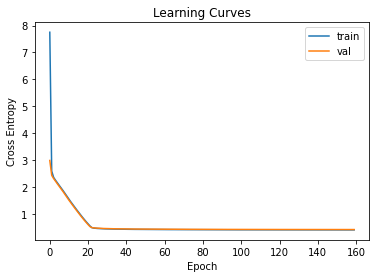

In [111]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(fit_model.history['loss'], label='train')
pyplot.plot(fit_model.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [112]:
#nn18.save('../Models/diabetes_02_model_acc86_loss_49')

INFO:tensorflow:Assets written to: ../Models/diabetes_02_model_acc86_loss_49\assets


## Attempt 19

In [113]:
# Split our preprocessed data into our features and target arrays
y = df_no_pre2["Diabetes_012"].values
X = df_no_pre2.drop(columns=['Diabetes_012']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [114]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 50
hidden_nodes_layer2 = 20
hidden_nodes_layer3 = 20
hidden_nodes_layer4 = 10
nn19 = tf.keras.models.Sequential()

# First hidden layer
nn19.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn19.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Dropout
nn19.add(tf.keras.layers.Dense(5, input_dim=5, kernel_initializer='ones', kernel_regularizer=tf.keras.regularizers.L1(0.01),
    activity_regularizer=tf.keras.regularizers.L2(0.01)))

# Third hidden layer
nn19.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Dropout
nn19.add(tf.keras.layers.Dense(5, input_dim=5, kernel_initializer='ones', kernel_regularizer=tf.keras.regularizers.L1(0.01),
    activity_regularizer=tf.keras.regularizers.L2(0.01)))

# Fourth hidden layer
nn19.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn19.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn19.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79 (Dense)             (None, 50)                1100      
_________________________________________________________________
dense_80 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_81 (Dense)             (None, 5)                 105       
_________________________________________________________________
dense_82 (Dense)             (None, 20)                120       
_________________________________________________________________
dense_83 (Dense)             (None, 5)                 105       
_________________________________________________________________
dense_84 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_85 (Dense)             (None, 1)               

In [115]:
nn19.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
fit_model = nn19.fit(X_train_scaled,y_train, batch_size = 32, epochs=200, callbacks=[callback], validation_split=0.2)

Epoch 1/200
4670/4670 [==============================] - 6s 1ms/step - loss: 16.7807 - accuracy: 0.8593 - val_loss: 4.6772 - val_accuracy: 0.8544
Epoch 2/200
4670/4670 [==============================] - 5s 1ms/step - loss: 3.1662 - accuracy: 0.8593 - val_loss: 2.5619 - val_accuracy: 0.8544
Epoch 3/200
4670/4670 [==============================] - 6s 1ms/step - loss: 2.4118 - accuracy: 0.8593 - val_loss: 2.3400 - val_accuracy: 0.8544
Epoch 4/200
4670/4670 [==============================] - 5s 1ms/step - loss: 2.2720 - accuracy: 0.8593 - val_loss: 2.2300 - val_accuracy: 0.8544
Epoch 5/200
4670/4670 [==============================] - 6s 1ms/step - loss: 2.1658 - accuracy: 0.8593 - val_loss: 2.1290 - val_accuracy: 0.8544
Epoch 6/200
4670/4670 [==============================] - 6s 1ms/step - loss: 2.0679 - accuracy: 0.8593 - val_loss: 2.0330 - val_accuracy: 0.8544
Epoch 7/200
4670/4670 [==============================] - 6s 1ms/step - loss: 1.9711 - accuracy: 0.8593 - val_loss: 1.9346 - val_a

4670/4670 [==============================] - 5s 1ms/step - loss: 0.4139 - accuracy: 0.7182 - val_loss: 0.4260 - val_accuracy: 0.7125
Epoch 57/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.4135 - accuracy: 0.7183 - val_loss: 0.4255 - val_accuracy: 0.7111
Epoch 58/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.4130 - accuracy: 0.7179 - val_loss: 0.4252 - val_accuracy: 0.7135
Epoch 59/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4126 - accuracy: 0.7187 - val_loss: 0.4246 - val_accuracy: 0.7107
Epoch 60/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.4122 - accuracy: 0.7181 - val_loss: 0.4242 - val_accuracy: 0.7102
Epoch 61/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4118 - accuracy: 0.7186 - val_loss: 0.4238 - val_accuracy: 0.7102
Epoch 62/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.4114 - accuracy: 0.7183 - val_loss: 0.4235 - val_accuracy

4670/4670 [==============================] - 5s 1ms/step - loss: 0.4015 - accuracy: 0.7238 - val_loss: 0.4142 - val_accuracy: 0.7155
Epoch 113/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.4014 - accuracy: 0.7231 - val_loss: 0.4141 - val_accuracy: 0.7179
Epoch 114/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4013 - accuracy: 0.7242 - val_loss: 0.4140 - val_accuracy: 0.7146
Epoch 115/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4012 - accuracy: 0.7236 - val_loss: 0.4139 - val_accuracy: 0.7172
Epoch 116/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.4011 - accuracy: 0.7242 - val_loss: 0.4137 - val_accuracy: 0.7145
Epoch 117/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.4009 - accuracy: 0.7234 - val_loss: 0.4137 - val_accuracy: 0.7179
Epoch 118/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4008 - accuracy: 0.7238 - val_loss: 0.4136 - val_ac

4670/4670 [==============================] - 5s 1ms/step - loss: 0.3969 - accuracy: 0.7255 - val_loss: 0.4102 - val_accuracy: 0.7219
Epoch 168/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3969 - accuracy: 0.7263 - val_loss: 0.4100 - val_accuracy: 0.7173
Epoch 169/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3968 - accuracy: 0.7259 - val_loss: 0.4099 - val_accuracy: 0.7158
Epoch 170/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3967 - accuracy: 0.7254 - val_loss: 0.4101 - val_accuracy: 0.7220
Epoch 171/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3967 - accuracy: 0.7260 - val_loss: 0.4100 - val_accuracy: 0.7212
Epoch 172/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3966 - accuracy: 0.7265 - val_loss: 0.4098 - val_accuracy: 0.7134
Epoch 173/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3966 - accuracy: 0.7255 - val_loss: 0.4098 - val_ac

In [116]:
model_loss, model_accuracy = nn19.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1946/1946 - 1s - loss: 0.4027 - accuracy: 0.7177
Loss: 0.40266385674476624, Accuracy: 0.7177296280860901


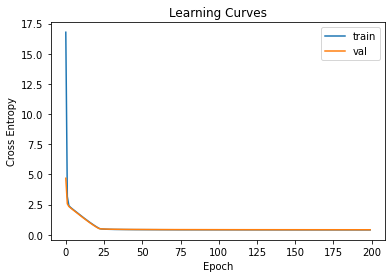

In [117]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(fit_model.history['loss'], label='train')
pyplot.plot(fit_model.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

## Attempt 29
### Attempted to bin and created dummies

In [119]:
df_no_pre2["BMI"].value_counts()

27.0    24180
26.0    20277
24.0    19318
25.0    16911
28.0    16253
        ...  
85.0        1
91.0        1
86.0        1
90.0        1
78.0        1
Name: BMI, Length: 83, dtype: int64

In [121]:
df_no_pre3 = df_no_pre2[:]
classifications_to_replace = df_no_pre3["BMI"].loc[lambda x : x>49].index.tolist()
classifications_to_replace2 = df_no_pre3["BMI"].loc[lambda x : (50>x) & (x>39)].index.tolist()
classifications_to_replace3 = df_no_pre3["BMI"].loc[lambda x : x<20].index.tolist()
for cls in classifications_to_replace:
    df_no_pre3.loc[cls:cls, ['BMI']] = ">49"
for cls in classifications_to_replace2:
    df_no_pre3.loc[cls:cls, ['BMI']] = "50>x>39"
for cls in classifications_to_replace3:
    df_no_pre3.loc[cls:cls, ['BMI']] = "<20"
df_no_pre3["BMI"].value_counts()

27.0       24180
26.0       20277
24.0       19318
25.0       16911
28.0       16253
23.0       15454
29.0       14602
30.0       14231
22.0       13502
31.0       12003
50>x>39    10844
32.0       10197
21.0        9780
33.0        8714
<20         7029
34.0        6991
20.0        6280
35.0        5419
36.0        4476
37.0        4027
38.0        3295
39.0        2798
>49         2468
Name: BMI, dtype: int64

In [122]:
df_dummies_3 = pd.get_dummies(df_no_pre3)
df_dummies_3.head()

,Diabetes_012,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,MentalHealth_3.0,MentalHealth_4.0,MentalHealth_5.0,MentalHealth_6.0,PhysicalHealth_1.0,PhysicalHealth_2.0,PhysicalHealth_3.0,PhysicalHealth_4.0,PhysicalHealth_5.0,PhysicalHealth_6.0
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,0,1,0,0,0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,1,0,0,0,0,0,1
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,0
4,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,0


In [123]:
# Split our preprocessed data into our features and target arrays
y = df_dummies_3["Diabetes_012"].values
X = df_dummies_3.drop(columns=['Diabetes_012']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [124]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 50
hidden_nodes_layer2 = 20
hidden_nodes_layer3 = 20
hidden_nodes_layer4 = 10
nn20 = tf.keras.models.Sequential()

# First hidden layer
nn20.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn20.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Dropout
nn20.add(tf.keras.layers.Dense(5, input_dim=5, kernel_initializer='ones', kernel_regularizer=tf.keras.regularizers.L1(0.01),
    activity_regularizer=tf.keras.regularizers.L2(0.01)))

# Third hidden layer
nn20.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Dropout
nn20.add(tf.keras.layers.Dense(5, input_dim=5, kernel_initializer='ones', kernel_regularizer=tf.keras.regularizers.L1(0.01),
    activity_regularizer=tf.keras.regularizers.L2(0.01)))

# Fourth hidden layer
nn20.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn20.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn20.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 50)                2700      
_________________________________________________________________
dense_87 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_88 (Dense)             (None, 5)                 105       
_________________________________________________________________
dense_89 (Dense)             (None, 20)                120       
_________________________________________________________________
dense_90 (Dense)             (None, 5)                 105       
_________________________________________________________________
dense_91 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_92 (Dense)             (None, 1)               

In [125]:
nn20.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
fit_model = nn20.fit(X_train_scaled,y_train, batch_size = 32, epochs=200, callbacks=[callback], validation_split=0.2)

Epoch 1/200
4670/4670 [==============================] - 6s 1ms/step - loss: 88.4087 - accuracy: 0.0194 - val_loss: 18.8864 - val_accuracy: 0.8544
Epoch 2/200
4670/4670 [==============================] - 6s 1ms/step - loss: 8.3987 - accuracy: 0.8571 - val_loss: 3.7130 - val_accuracy: 0.8544
Epoch 3/200
4670/4670 [==============================] - 6s 1ms/step - loss: 2.8404 - accuracy: 0.8593 - val_loss: 2.4637 - val_accuracy: 0.8544
Epoch 4/200
4670/4670 [==============================] - 6s 1ms/step - loss: 2.3510 - accuracy: 0.8593 - val_loss: 2.2907 - val_accuracy: 0.8544
Epoch 5/200
4670/4670 [==============================] - 6s 1ms/step - loss: 2.2238 - accuracy: 0.8593 - val_loss: 2.1838 - val_accuracy: 0.8544
Epoch 6/200
4670/4670 [==============================] - 6s 1ms/step - loss: 2.1212 - accuracy: 0.8593 - val_loss: 2.0850 - val_accuracy: 0.8544
Epoch 7/200
4670/4670 [==============================] - 6s 1ms/step - loss: 2.0235 - accuracy: 0.8593 - val_loss: 1.9889 - val_

4670/4670 [==============================] - 6s 1ms/step - loss: 0.4110 - accuracy: 0.7270 - val_loss: 0.4238 - val_accuracy: 0.7245
Epoch 58/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4106 - accuracy: 0.7279 - val_loss: 0.4233 - val_accuracy: 0.7210
Epoch 59/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4102 - accuracy: 0.7276 - val_loss: 0.4229 - val_accuracy: 0.7212
Epoch 60/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4098 - accuracy: 0.7275 - val_loss: 0.4226 - val_accuracy: 0.7206
Epoch 61/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4095 - accuracy: 0.7277 - val_loss: 0.4222 - val_accuracy: 0.7205
Epoch 62/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4091 - accuracy: 0.7272 - val_loss: 0.4220 - val_accuracy: 0.7232
Epoch 63/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4088 - accuracy: 0.7286 - val_loss: 0.4215 - val_accuracy

4670/4670 [==============================] - 6s 1ms/step - loss: 0.3990 - accuracy: 0.7268 - val_loss: 0.4130 - val_accuracy: 0.7191
Epoch 114/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3989 - accuracy: 0.7271 - val_loss: 0.4129 - val_accuracy: 0.7192
Epoch 115/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3987 - accuracy: 0.7272 - val_loss: 0.4129 - val_accuracy: 0.7200
Epoch 116/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3986 - accuracy: 0.7268 - val_loss: 0.4128 - val_accuracy: 0.7206
Epoch 117/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3985 - accuracy: 0.7273 - val_loss: 0.4126 - val_accuracy: 0.7178
Epoch 118/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3984 - accuracy: 0.7268 - val_loss: 0.4126 - val_accuracy: 0.7207
Epoch 119/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3983 - accuracy: 0.7274 - val_loss: 0.4124 - val_ac

Epoch 169/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3938 - accuracy: 0.7286 - val_loss: 0.4095 - val_accuracy: 0.7150
Epoch 170/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3937 - accuracy: 0.7273 - val_loss: 0.4095 - val_accuracy: 0.7206
Epoch 171/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3937 - accuracy: 0.7280 - val_loss: 0.4094 - val_accuracy: 0.7193
Epoch 172/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3936 - accuracy: 0.7285 - val_loss: 0.4093 - val_accuracy: 0.7154
Epoch 173/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3935 - accuracy: 0.7277 - val_loss: 0.4093 - val_accuracy: 0.7189
Epoch 174/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3935 - accuracy: 0.7278 - val_loss: 0.4093 - val_accuracy: 0.7196
Epoch 175/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3934 - accuracy: 0.7283 - val_loss: 0

In [126]:
model_loss, model_accuracy = nn20.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1946/1946 - 1s - loss: 0.4038 - accuracy: 0.7245
Loss: 0.40382465720176697, Accuracy: 0.724459171295166


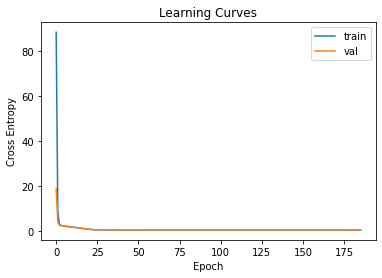

In [127]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(fit_model.history['loss'], label='train')
pyplot.plot(fit_model.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

# Attempt 21
## Remove Cholcheck

In [128]:
df_no_pre4 = df_no_pre2.drop(columns="CholCheck")
df_no_pre4

,Diabetes_012,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Income,MentalHealth,PhysicalHealth
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,1.0,0.0,9.0,4.0,3.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,0.0,0.0,7.0,6.0,1.0,1.0,1.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,5.0,1.0,0.0,9.0,4.0,8.0,6.0,6.0
3,0.0,1.0,0.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,11.0,3.0,6.0,1.0,1.0
4,0.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,11.0,5.0,4.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,1.0,5.0,6.0,7.0,1.0,1.0
253676,2.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,1.0,0.0,11.0,2.0,4.0,1.0,1.0
253677,0.0,0.0,0.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,2.0,5.0,2.0,1.0,1.0
253678,0.0,1.0,0.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,1.0,7.0,5.0,1.0,1.0,1.0


In [129]:
# Split our preprocessed data into our features and target arrays
y = df_no_pre4["Diabetes_012"].values
X = df_no_pre4.drop(columns=['Diabetes_012']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [130]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 50
hidden_nodes_layer2 = 20
hidden_nodes_layer3 = 20
hidden_nodes_layer4 = 10
nn21 = tf.keras.models.Sequential()

# First hidden layer
nn21.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn21.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Dropout
nn21.add(tf.keras.layers.Dense(5, input_dim=5, kernel_initializer='ones', kernel_regularizer=tf.keras.regularizers.L1(0.01),
    activity_regularizer=tf.keras.regularizers.L2(0.01)))

# Third hidden layer
nn21.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Dropout
nn21.add(tf.keras.layers.Dense(5, input_dim=5, kernel_initializer='ones', kernel_regularizer=tf.keras.regularizers.L1(0.01),
    activity_regularizer=tf.keras.regularizers.L2(0.01)))

# Fourth hidden layer
nn21.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn21.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn21.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_93 (Dense)             (None, 50)                1050      
_________________________________________________________________
dense_94 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_95 (Dense)             (None, 5)                 105       
_________________________________________________________________
dense_96 (Dense)             (None, 20)                120       
_________________________________________________________________
dense_97 (Dense)             (None, 5)                 105       
_________________________________________________________________
dense_98 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_99 (Dense)             (None, 1)               

In [131]:
nn21.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
fit_model = nn21.fit(X_train_scaled,y_train, batch_size = 32, epochs=200, callbacks=[callback], validation_split=0.2)

Epoch 1/200
4670/4670 [==============================] - 6s 1ms/step - loss: 8.8135 - accuracy: 0.0325 - val_loss: 3.4106 - val_accuracy: 0.3962
Epoch 2/200
4670/4670 [==============================] - 6s 1ms/step - loss: 2.7540 - accuracy: 0.8267 - val_loss: 2.4696 - val_accuracy: 0.8544
Epoch 3/200
4670/4670 [==============================] - 6s 1ms/step - loss: 2.3728 - accuracy: 0.8593 - val_loss: 2.3198 - val_accuracy: 0.8544
Epoch 4/200
4670/4670 [==============================] - 6s 1ms/step - loss: 2.2559 - accuracy: 0.8593 - val_loss: 2.2163 - val_accuracy: 0.8544
Epoch 5/200
4670/4670 [==============================] - 6s 1ms/step - loss: 2.1541 - accuracy: 0.8593 - val_loss: 2.1163 - val_accuracy: 0.8544
Epoch 6/200
4670/4670 [==============================] - 6s 1ms/step - loss: 2.0537 - accuracy: 0.8593 - val_loss: 2.0162 - val_accuracy: 0.8544
Epoch 7/200
4670/4670 [==============================] - 6s 1ms/step - loss: 1.9524 - accuracy: 0.8593 - val_loss: 1.9143 - val_ac

4670/4670 [==============================] - 6s 1ms/step - loss: 0.4127 - accuracy: 0.7291 - val_loss: 0.4252 - val_accuracy: 0.7231
Epoch 58/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4123 - accuracy: 0.7289 - val_loss: 0.4248 - val_accuracy: 0.7238
Epoch 59/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4119 - accuracy: 0.7288 - val_loss: 0.4244 - val_accuracy: 0.7232
Epoch 60/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4115 - accuracy: 0.7295 - val_loss: 0.4240 - val_accuracy: 0.7212
Epoch 61/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4112 - accuracy: 0.7283 - val_loss: 0.4237 - val_accuracy: 0.7236
Epoch 62/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4108 - accuracy: 0.7287 - val_loss: 0.4233 - val_accuracy: 0.7235
Epoch 63/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4105 - accuracy: 0.7284 - val_loss: 0.4231 - val_accuracy

4670/4670 [==============================] - 6s 1ms/step - loss: 0.4014 - accuracy: 0.7279 - val_loss: 0.4143 - val_accuracy: 0.7212
Epoch 114/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4013 - accuracy: 0.7281 - val_loss: 0.4142 - val_accuracy: 0.7198
Epoch 115/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4012 - accuracy: 0.7279 - val_loss: 0.4141 - val_accuracy: 0.7190
Epoch 116/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4011 - accuracy: 0.7280 - val_loss: 0.4140 - val_accuracy: 0.7188
Epoch 117/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4010 - accuracy: 0.7278 - val_loss: 0.4139 - val_accuracy: 0.7218
Epoch 118/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4009 - accuracy: 0.7283 - val_loss: 0.4137 - val_accuracy: 0.7177
Epoch 119/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4008 - accuracy: 0.7274 - val_loss: 0.4138 - val_ac

Epoch 169/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3971 - accuracy: 0.7274 - val_loss: 0.4106 - val_accuracy: 0.7239
Epoch 170/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3971 - accuracy: 0.7278 - val_loss: 0.4104 - val_accuracy: 0.7199
Epoch 171/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3970 - accuracy: 0.7276 - val_loss: 0.4104 - val_accuracy: 0.7220
Epoch 172/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3969 - accuracy: 0.7281 - val_loss: 0.4103 - val_accuracy: 0.7188
Epoch 173/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3969 - accuracy: 0.7268 - val_loss: 0.4103 - val_accuracy: 0.7228
Epoch 174/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3968 - accuracy: 0.7281 - val_loss: 0.4102 - val_accuracy: 0.7186
Epoch 175/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3968 - accuracy: 0.7274 - val_loss: 0

In [132]:
model_loss, model_accuracy = nn21.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1946/1946 - 1s - loss: 0.4039 - accuracy: 0.7185
Loss: 0.4038912057876587, Accuracy: 0.7185326814651489


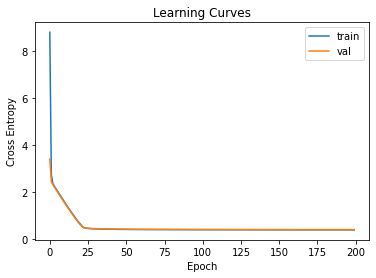

In [133]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(fit_model.history['loss'], label='train')
pyplot.plot(fit_model.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

## Attempt 22
### Remove CholCheck, HvyAlcoholConsump

In [134]:
df_no_pre5 = df_no_pre2.drop(columns=["CholCheck", "HvyAlcoholConsump"])
df_no_pre5

,Diabetes_012,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Income,MentalHealth,PhysicalHealth
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,5.0,1.0,0.0,9.0,4.0,3.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,7.0,6.0,1.0,1.0,1.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,5.0,1.0,0.0,9.0,4.0,8.0,6.0,6.0
3,0.0,1.0,0.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,11.0,3.0,6.0,1.0,1.0
4,0.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,11.0,5.0,4.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,1.0,5.0,6.0,7.0,1.0,1.0
253676,2.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,1.0,0.0,11.0,2.0,4.0,1.0,1.0
253677,0.0,0.0,0.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,5.0,2.0,1.0,1.0
253678,0.0,1.0,0.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,1.0,7.0,5.0,1.0,1.0,1.0


In [135]:
# Split our preprocessed data into our features and target arrays
y = df_no_pre5["Diabetes_012"].values
X = df_no_pre5.drop(columns=['Diabetes_012']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [136]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 50
hidden_nodes_layer2 = 20
hidden_nodes_layer3 = 20
hidden_nodes_layer4 = 10
nn22 = tf.keras.models.Sequential()

# First hidden layer
nn22.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn22.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Dropout
nn22.add(tf.keras.layers.Dense(5, input_dim=5, kernel_initializer='ones', kernel_regularizer=tf.keras.regularizers.L1(0.01),
    activity_regularizer=tf.keras.regularizers.L2(0.01)))

# Third hidden layer
nn22.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Dropout
nn22.add(tf.keras.layers.Dense(5, input_dim=5, kernel_initializer='ones', kernel_regularizer=tf.keras.regularizers.L1(0.01),
    activity_regularizer=tf.keras.regularizers.L2(0.01)))

# Fourth hidden layer
nn22.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn22.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn22.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            (None, 50)                1000      
_________________________________________________________________
dense_101 (Dense)            (None, 20)                1020      
_________________________________________________________________
dense_102 (Dense)            (None, 5)                 105       
_________________________________________________________________
dense_103 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_104 (Dense)            (None, 5)                 105       
_________________________________________________________________
dense_105 (Dense)            (None, 10)                60        
_________________________________________________________________
dense_106 (Dense)            (None, 1)               

In [137]:
nn22.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
fit_model = nn22.fit(X_train_scaled,y_train, batch_size = 32, epochs=200, callbacks=[callback], validation_split=0.2)

Epoch 1/200
4670/4670 [==============================] - 6s 1ms/step - loss: 4.9554 - accuracy: 0.8593 - val_loss: 2.8084 - val_accuracy: 0.8544
Epoch 2/200
4670/4670 [==============================] - 6s 1ms/step - loss: 2.5251 - accuracy: 0.8593 - val_loss: 2.3955 - val_accuracy: 0.8544
Epoch 3/200
4670/4670 [==============================] - 5s 1ms/step - loss: 2.3213 - accuracy: 0.8593 - val_loss: 2.2770 - val_accuracy: 0.8544
Epoch 4/200
4670/4670 [==============================] - 6s 1ms/step - loss: 2.2138 - accuracy: 0.8593 - val_loss: 2.1762 - val_accuracy: 0.8544
Epoch 5/200
4670/4670 [==============================] - 5s 1ms/step - loss: 2.1135 - accuracy: 0.8593 - val_loss: 2.0781 - val_accuracy: 0.8544
Epoch 6/200
4670/4670 [==============================] - 6s 1ms/step - loss: 2.0162 - accuracy: 0.8593 - val_loss: 1.9815 - val_accuracy: 0.8544
Epoch 7/200
4670/4670 [==============================] - 6s 1ms/step - loss: 1.9186 - accuracy: 0.8593 - val_loss: 1.8831 - val_ac

4670/4670 [==============================] - 6s 1ms/step - loss: 0.4114 - accuracy: 0.7244 - val_loss: 0.4229 - val_accuracy: 0.7172
Epoch 58/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4110 - accuracy: 0.7243 - val_loss: 0.4226 - val_accuracy: 0.7196
Epoch 59/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4106 - accuracy: 0.7248 - val_loss: 0.4222 - val_accuracy: 0.7160
Epoch 60/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4103 - accuracy: 0.7252 - val_loss: 0.4219 - val_accuracy: 0.7177
Epoch 61/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4099 - accuracy: 0.7235 - val_loss: 0.4216 - val_accuracy: 0.7212
Epoch 62/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4096 - accuracy: 0.7248 - val_loss: 0.4214 - val_accuracy: 0.7226
Epoch 63/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4093 - accuracy: 0.7251 - val_loss: 0.4210 - val_accuracy

4670/4670 [==============================] - 6s 1ms/step - loss: 0.4008 - accuracy: 0.7261 - val_loss: 0.4132 - val_accuracy: 0.7215
Epoch 114/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4008 - accuracy: 0.7256 - val_loss: 0.4131 - val_accuracy: 0.7227
Epoch 115/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4007 - accuracy: 0.7262 - val_loss: 0.4130 - val_accuracy: 0.7168
Epoch 116/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4006 - accuracy: 0.7258 - val_loss: 0.4129 - val_accuracy: 0.7208
Epoch 117/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4005 - accuracy: 0.7262 - val_loss: 0.4128 - val_accuracy: 0.7180
Epoch 118/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4004 - accuracy: 0.7254 - val_loss: 0.4129 - val_accuracy: 0.7240
Epoch 119/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4003 - accuracy: 0.7261 - val_loss: 0.4127 - val_ac

Epoch 169/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3970 - accuracy: 0.7271 - val_loss: 0.4099 - val_accuracy: 0.7195
Epoch 170/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3970 - accuracy: 0.7272 - val_loss: 0.4098 - val_accuracy: 0.7171
Epoch 171/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3969 - accuracy: 0.7266 - val_loss: 0.4099 - val_accuracy: 0.7228
Epoch 172/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3969 - accuracy: 0.7273 - val_loss: 0.4098 - val_accuracy: 0.7205
Epoch 173/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3968 - accuracy: 0.7272 - val_loss: 0.4098 - val_accuracy: 0.7221
Epoch 174/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3968 - accuracy: 0.7274 - val_loss: 0.4097 - val_accuracy: 0.7190
Epoch 175/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3967 - accuracy: 0.7268 - val_loss: 0

In [138]:
model_loss, model_accuracy = nn22.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1946/1946 - 1s - loss: 0.4039 - accuracy: 0.7240
Loss: 0.4038577973842621, Accuracy: 0.7240415811538696


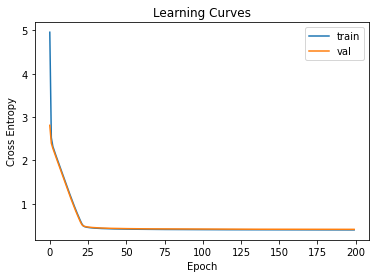

In [139]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(fit_model.history['loss'], label='train')
pyplot.plot(fit_model.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

## Attempt 23
### Removed CholCheck, HvyAlcoholConsump, AnyHealthcare, Stroke

In [140]:
df_no_pre6 = df_no_pre2.drop(columns=["CholCheck", "HvyAlcoholConsump", "AnyHealthcare", "Stroke"])
df_no_pre6.head()

,Diabetes_012,HighBP,HighChol,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Income,MentalHealth,PhysicalHealth
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,5.0,1.0,0.0,9.0,4.0,3.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,7.0,6.0,1.0,1.0,1.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,1.0,0.0,9.0,4.0,8.0,6.0,6.0
3,0.0,1.0,0.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,11.0,3.0,6.0,1.0,1.0
4,0.0,1.0,1.0,24.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,11.0,5.0,4.0,1.0,1.0


In [141]:
# Split our preprocessed data into our features and target arrays
y = df_no_pre6["Diabetes_012"].values
X = df_no_pre6.drop(columns=['Diabetes_012']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [142]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 50
hidden_nodes_layer2 = 20
hidden_nodes_layer3 = 20
hidden_nodes_layer4 = 10
nn23 = tf.keras.models.Sequential()

# First hidden layer
nn23.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn23.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Dropout
nn23.add(tf.keras.layers.Dense(5, input_dim=5, kernel_initializer='ones', kernel_regularizer=tf.keras.regularizers.L1(0.01),
    activity_regularizer=tf.keras.regularizers.L2(0.01)))

# Third hidden layer
nn23.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Dropout
nn23.add(tf.keras.layers.Dense(5, input_dim=5, kernel_initializer='ones', kernel_regularizer=tf.keras.regularizers.L1(0.01),
    activity_regularizer=tf.keras.regularizers.L2(0.01)))

# Fourth hidden layer
nn23.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn23.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn23.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_107 (Dense)            (None, 50)                900       
_________________________________________________________________
dense_108 (Dense)            (None, 20)                1020      
_________________________________________________________________
dense_109 (Dense)            (None, 5)                 105       
_________________________________________________________________
dense_110 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_111 (Dense)            (None, 5)                 105       
_________________________________________________________________
dense_112 (Dense)            (None, 10)                60        
_________________________________________________________________
dense_113 (Dense)            (None, 1)               

In [143]:
nn23.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
fit_model = nn23.fit(X_train_scaled,y_train, batch_size = 32, epochs=300, callbacks=[callback], validation_split=0.2)

Epoch 1/300
4670/4670 [==============================] - 6s 1ms/step - loss: 14.0019 - accuracy: 0.5106 - val_loss: 4.0269 - val_accuracy: 0.8544
Epoch 2/300
4670/4670 [==============================] - 6s 1ms/step - loss: 2.9422 - accuracy: 0.8593 - val_loss: 2.4915 - val_accuracy: 0.8544
Epoch 3/300
4670/4670 [==============================] - 6s 1ms/step - loss: 2.3808 - accuracy: 0.8593 - val_loss: 2.3238 - val_accuracy: 0.8544
Epoch 4/300
4670/4670 [==============================] - 6s 1ms/step - loss: 2.2590 - accuracy: 0.8593 - val_loss: 2.2213 - val_accuracy: 0.8544
Epoch 5/300
4670/4670 [==============================] - 6s 1ms/step - loss: 2.1597 - accuracy: 0.8593 - val_loss: 2.1248 - val_accuracy: 0.8544
Epoch 6/300
4670/4670 [==============================] - 6s 1ms/step - loss: 2.0628 - accuracy: 0.8593 - val_loss: 2.0281 - val_accuracy: 0.8544
Epoch 7/300
4670/4670 [==============================] - 6s 1ms/step - loss: 1.9644 - accuracy: 0.8593 - val_loss: 1.9286 - val_a

Epoch 57/300
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4137 - accuracy: 0.7297 - val_loss: 0.4259 - val_accuracy: 0.7268
Epoch 58/300
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4133 - accuracy: 0.7297 - val_loss: 0.4254 - val_accuracy: 0.7249
Epoch 59/300
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4129 - accuracy: 0.7289 - val_loss: 0.4251 - val_accuracy: 0.7262
Epoch 60/300
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4125 - accuracy: 0.7294 - val_loss: 0.4247 - val_accuracy: 0.7247
Epoch 61/300
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4121 - accuracy: 0.7294 - val_loss: 0.4243 - val_accuracy: 0.7213
Epoch 62/300
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4118 - accuracy: 0.7287 - val_loss: 0.4239 - val_accuracy: 0.7224
Epoch 63/300
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4114 - accuracy: 0.7292 - val_loss: 0.4236 -

Epoch 113/300
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4019 - accuracy: 0.7282 - val_loss: 0.4145 - val_accuracy: 0.7206
Epoch 114/300
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4018 - accuracy: 0.7273 - val_loss: 0.4145 - val_accuracy: 0.7232
Epoch 115/300
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4017 - accuracy: 0.7281 - val_loss: 0.4144 - val_accuracy: 0.7233
Epoch 116/300
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4016 - accuracy: 0.7283 - val_loss: 0.4142 - val_accuracy: 0.7204
Epoch 117/300
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4015 - accuracy: 0.7280 - val_loss: 0.4141 - val_accuracy: 0.7197
Epoch 118/300
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4014 - accuracy: 0.7278 - val_loss: 0.4140 - val_accuracy: 0.7217
Epoch 119/300
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4013 - accuracy: 0.7282 - val_loss: 0

Epoch 169/300
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3976 - accuracy: 0.7273 - val_loss: 0.4107 - val_accuracy: 0.7243
Epoch 170/300
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3976 - accuracy: 0.7280 - val_loss: 0.4105 - val_accuracy: 0.7206
Epoch 171/300
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3975 - accuracy: 0.7275 - val_loss: 0.4105 - val_accuracy: 0.7228
Epoch 172/300
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3974 - accuracy: 0.7276 - val_loss: 0.4104 - val_accuracy: 0.7185
Epoch 173/300
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3974 - accuracy: 0.7269 - val_loss: 0.4105 - val_accuracy: 0.7241
Epoch 174/300
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3973 - accuracy: 0.7280 - val_loss: 0.4104 - val_accuracy: 0.7210
Epoch 175/300
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3973 - accuracy: 0.7271 - val_loss: 0

Epoch 225/300
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3952 - accuracy: 0.7262 - val_loss: 0.4089 - val_accuracy: 0.7289
Epoch 226/300
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3953 - accuracy: 0.7277 - val_loss: 0.4086 - val_accuracy: 0.7226
Epoch 227/300
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3952 - accuracy: 0.7277 - val_loss: 0.4086 - val_accuracy: 0.7196
Epoch 228/300
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3952 - accuracy: 0.7273 - val_loss: 0.4085 - val_accuracy: 0.7180
Epoch 229/300
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3952 - accuracy: 0.7271 - val_loss: 0.4085 - val_accuracy: 0.7212
Epoch 230/300
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3951 - accuracy: 0.7272 - val_loss: 0.4085 - val_accuracy: 0.7196
Epoch 231/300
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3951 - accuracy: 0.7272 - val_loss: 0

In [144]:
model_loss, model_accuracy = nn23.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1946/1946 - 1s - loss: 0.4027 - accuracy: 0.7230
Loss: 0.4026993215084076, Accuracy: 0.7229976058006287


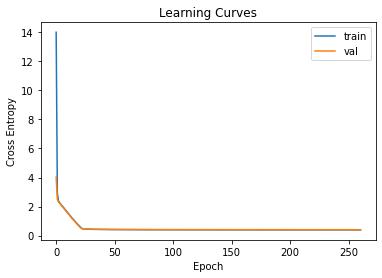

In [145]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(fit_model.history['loss'], label='train')
pyplot.plot(fit_model.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

## Attempt 24
### Going back to model 18 and trying to improve that. Used Huger loss from this point on instead

In [146]:
# Split our preprocessed data into our features and target arrays
y = df_no_pre2["Diabetes_012"].values
X = df_no_pre2.drop(columns=['Diabetes_012']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [147]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 70
hidden_nodes_layer2 = 20
hidden_nodes_layer3 = 20
hidden_nodes_layer4 = 10
nn24 = tf.keras.models.Sequential()

# First hidden layer
nn24.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn24.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Dropout
nn24.add(tf.keras.layers.Dense(5, input_dim=5, kernel_initializer='ones', kernel_regularizer=tf.keras.regularizers.L1(0.01),
    activity_regularizer=tf.keras.regularizers.L2(0.01)))

# Third hidden layer
nn24.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Dropout
nn24.add(tf.keras.layers.Dense(5, input_dim=5, kernel_initializer='ones', kernel_regularizer=tf.keras.regularizers.L1(0.01),
    activity_regularizer=tf.keras.regularizers.L2(0.01)))

# Fourth hidden layer
nn24.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn24.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn24.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_114 (Dense)            (None, 70)                1540      
_________________________________________________________________
dense_115 (Dense)            (None, 20)                1420      
_________________________________________________________________
dense_116 (Dense)            (None, 5)                 105       
_________________________________________________________________
dense_117 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_118 (Dense)            (None, 5)                 105       
_________________________________________________________________
dense_119 (Dense)            (None, 10)                60        
_________________________________________________________________
dense_120 (Dense)            (None, 1)               

In [151]:
nn24.compile(loss=tf.keras.losses.Huber(delta=1.0), optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
fit_model = nn24.fit(X_train_scaled,y_train, batch_size = 32, epochs=200, callbacks=[callback], validation_split=0.2)

Epoch 1/200
4670/4670 [==============================] - 7s 1ms/step - loss: 7.6963 - accuracy: 0.8592 - val_loss: 2.7748 - val_accuracy: 0.8544
Epoch 2/200
4670/4670 [==============================] - 6s 1ms/step - loss: 2.3201 - accuracy: 0.8593 - val_loss: 2.1343 - val_accuracy: 0.8544
Epoch 3/200
4670/4670 [==============================] - 6s 1ms/step - loss: 2.0606 - accuracy: 0.8593 - val_loss: 2.0091 - val_accuracy: 0.8544
Epoch 4/200
4670/4670 [==============================] - 6s 1ms/step - loss: 1.9523 - accuracy: 0.8593 - val_loss: 1.9089 - val_accuracy: 0.8544
Epoch 5/200
4670/4670 [==============================] - 6s 1ms/step - loss: 1.8545 - accuracy: 0.8593 - val_loss: 1.8129 - val_accuracy: 0.8544
Epoch 6/200
4670/4670 [==============================] - 6s 1ms/step - loss: 1.7593 - accuracy: 0.8593 - val_loss: 1.7183 - val_accuracy: 0.8544
Epoch 7/200
4670/4670 [==============================] - 6s 1ms/step - loss: 1.6647 - accuracy: 0.8593 - val_loss: 1.6238 - val_ac

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1821 - accuracy: 0.7844 - val_loss: 0.1877 - val_accuracy: 0.7790
Epoch 58/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1819 - accuracy: 0.7846 - val_loss: 0.1876 - val_accuracy: 0.7790
Epoch 59/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1818 - accuracy: 0.7843 - val_loss: 0.1874 - val_accuracy: 0.7791
Epoch 60/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1816 - accuracy: 0.7842 - val_loss: 0.1873 - val_accuracy: 0.7798
Epoch 61/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.1815 - accuracy: 0.7843 - val_loss: 0.1871 - val_accuracy: 0.7788
Epoch 62/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1813 - accuracy: 0.7842 - val_loss: 0.1870 - val_accuracy: 0.7743
Epoch 63/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1812 - accuracy: 0.7833 - val_loss: 0.1868 - val_accuracy

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1775 - accuracy: 0.7796 - val_loss: 0.1833 - val_accuracy: 0.7691
Epoch 114/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.1775 - accuracy: 0.7791 - val_loss: 0.1833 - val_accuracy: 0.7755
Epoch 115/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.1774 - accuracy: 0.7794 - val_loss: 0.1832 - val_accuracy: 0.7714
Epoch 116/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.1774 - accuracy: 0.7787 - val_loss: 0.1832 - val_accuracy: 0.7776
Epoch 117/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1773 - accuracy: 0.7792 - val_loss: 0.1832 - val_accuracy: 0.7753
Epoch 118/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.1773 - accuracy: 0.7794 - val_loss: 0.1831 - val_accuracy: 0.7757
Epoch 119/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1773 - accuracy: 0.7795 - val_loss: 0.1831 - val_ac

4670/4670 [==============================] - 5s 1ms/step - loss: 0.1759 - accuracy: 0.7785 - val_loss: 0.1819 - val_accuracy: 0.7725
Epoch 169/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.1759 - accuracy: 0.7785 - val_loss: 0.1819 - val_accuracy: 0.7729
Epoch 170/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.1759 - accuracy: 0.7787 - val_loss: 0.1818 - val_accuracy: 0.7698
Epoch 171/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.1758 - accuracy: 0.7783 - val_loss: 0.1818 - val_accuracy: 0.7738
Epoch 172/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.1758 - accuracy: 0.7788 - val_loss: 0.1818 - val_accuracy: 0.7693
Epoch 173/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.1758 - accuracy: 0.7781 - val_loss: 0.1818 - val_accuracy: 0.7720
Epoch 174/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.1758 - accuracy: 0.7785 - val_loss: 0.1818 - val_ac

In [152]:
model_loss, model_accuracy = nn24.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1946/1946 - 1s - loss: 0.1790 - accuracy: 0.7781
Loss: 0.1790054738521576, Accuracy: 0.7781025767326355


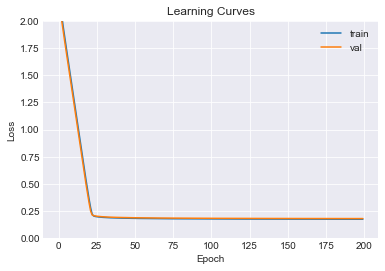

In [186]:
pyplot.style.use('seaborn-darkgrid')
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Loss')
pyplot.plot(fit_model.history['loss'], label='train')
pyplot.plot(fit_model.history['val_loss'], label='val')
pyplot.ylim([0, 2])
pyplot.legend()
pyplot.show()

In [187]:
#nn24.save('../Models/diabetes_02_model_acc77_loss_17')

INFO:tensorflow:Assets written to: ../Models/diabetes_02_model_acc77_loss_17\assets


## Attempt 25
### Removed one dropout layer and kernel_regularizer

In [164]:
# Split our preprocessed data into our features and target arrays
y = df_no_pre2["Diabetes_012"].values
X = df_no_pre2.drop(columns=['Diabetes_012']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [165]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 70
hidden_nodes_layer2 = 20
hidden_nodes_layer3 = 20
hidden_nodes_layer4 = 10
nn25 = tf.keras.models.Sequential()

# First hidden layer
nn25.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn25.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Dropout
#nn25.add(tf.keras.layers.Dense(5, input_dim=5, kernel_initializer='ones'))

# Third hidden layer
nn25.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Dropout
nn25.add(tf.keras.layers.Dense(5, input_dim=5, kernel_initializer='ones'))

# Fourth hidden layer
nn25.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn25.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn25.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_121 (Dense)            (None, 70)                1540      
_________________________________________________________________
dense_122 (Dense)            (None, 20)                1420      
_________________________________________________________________
dense_123 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_124 (Dense)            (None, 5)                 105       
_________________________________________________________________
dense_125 (Dense)            (None, 10)                60        
_________________________________________________________________
dense_126 (Dense)            (None, 1)                 11        
Total params: 3,556
Trainable params: 3,556
Non-trainable params: 0
___________________________________________________

In [166]:
nn25.compile(loss=tf.keras.losses.Huber(delta=1.0), optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
fit_model2 = nn25.fit(X_train_scaled,y_train, batch_size = 32, epochs=200, callbacks=[callback], validation_split=0.2)

Epoch 1/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3079 - accuracy: 0.1682 - val_loss: 0.2484 - val_accuracy: 0.5569
Epoch 2/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.2343 - accuracy: 0.7304 - val_loss: 0.2316 - val_accuracy: 0.7887
Epoch 3/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.2201 - accuracy: 0.8047 - val_loss: 0.2181 - val_accuracy: 0.8001
Epoch 4/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.2063 - accuracy: 0.8058 - val_loss: 0.2049 - val_accuracy: 0.8019
Epoch 5/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1942 - accuracy: 0.8084 - val_loss: 0.1949 - val_accuracy: 0.7996
Epoch 6/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1858 - accuracy: 0.8031 - val_loss: 0.1885 - val_accuracy: 0.7931
Epoch 7/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1808 - accuracy: 0.7963 - val_loss: 0.1850 - val_ac

4670/4670 [==============================] - 6s 1ms/step - loss: 0.1719 - accuracy: 0.7830 - val_loss: 0.1782 - val_accuracy: 0.7759
Epoch 57/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1719 - accuracy: 0.7825 - val_loss: 0.1783 - val_accuracy: 0.7788
Epoch 58/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1718 - accuracy: 0.7832 - val_loss: 0.1782 - val_accuracy: 0.7772
Epoch 59/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1718 - accuracy: 0.7834 - val_loss: 0.1782 - val_accuracy: 0.7747
Epoch 60/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1718 - accuracy: 0.7832 - val_loss: 0.1782 - val_accuracy: 0.7747
Epoch 61/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1718 - accuracy: 0.7835 - val_loss: 0.1782 - val_accuracy: 0.7749
Epoch 62/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1717 - accuracy: 0.7828 - val_loss: 0.1782 - val_accuracy

In [167]:
model_loss, model_accuracy = nn25.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1946/1946 - 1s - loss: 0.1759 - accuracy: 0.7763
Loss: 0.17593960464000702, Accuracy: 0.7763358950614929


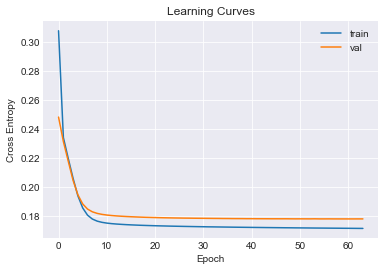

In [169]:
pyplot.style.use('seaborn-darkgrid')
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(fit_model2.history['loss'], label='train')
pyplot.plot(fit_model2.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

## Attempt 26
### Added dropout layer back and decreased early stop patience

In [173]:
# Split our preprocessed data into our features and target arrays
y = df_no_pre2["Diabetes_012"].values
X = df_no_pre2.drop(columns=['Diabetes_012']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [174]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 70
hidden_nodes_layer2 = 20
hidden_nodes_layer3 = 20
hidden_nodes_layer4 = 10
nn26 = tf.keras.models.Sequential()

# First hidden layer
nn26.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn26.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Dropout
nn25.add(tf.keras.layers.Dense(5, input_dim=5, kernel_initializer='ones'))

# Third hidden layer
nn26.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Dropout
nn26.add(tf.keras.layers.Dense(5, input_dim=5, kernel_initializer='ones'))

# Fourth hidden layer
nn26.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn26.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn26.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_127 (Dense)            (None, 70)                1540      
_________________________________________________________________
dense_128 (Dense)            (None, 20)                1420      
_________________________________________________________________
dense_130 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_131 (Dense)            (None, 5)                 105       
_________________________________________________________________
dense_132 (Dense)            (None, 10)                60        
_________________________________________________________________
dense_133 (Dense)            (None, 1)                 11        
Total params: 3,556
Trainable params: 3,556
Non-trainable params: 0
___________________________________________________

In [175]:
nn26.compile(loss=tf.keras.losses.Huber(delta=1.0), optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
fit_model3 = nn26.fit(X_train_scaled,y_train, batch_size = 32, epochs=200, callbacks=[callback], validation_split=0.2)

Epoch 1/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.2970 - accuracy: 0.1706 - val_loss: 0.2510 - val_accuracy: 0.5127
Epoch 2/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.2356 - accuracy: 0.7014 - val_loss: 0.2300 - val_accuracy: 0.7834
Epoch 3/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.2163 - accuracy: 0.8010 - val_loss: 0.2128 - val_accuracy: 0.7988
Epoch 4/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.2001 - accuracy: 0.7975 - val_loss: 0.1989 - val_accuracy: 0.7840
Epoch 5/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1887 - accuracy: 0.7838 - val_loss: 0.1905 - val_accuracy: 0.7671
Epoch 6/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1825 - accuracy: 0.7727 - val_loss: 0.1866 - val_accuracy: 0.7591
Epoch 7/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.1799 - accuracy: 0.7663 - val_loss: 0.1849 - val_ac

4670/4670 [==============================] - 5s 1ms/step - loss: 0.1729 - accuracy: 0.7789 - val_loss: 0.1796 - val_accuracy: 0.7698
Epoch 58/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.1729 - accuracy: 0.7789 - val_loss: 0.1796 - val_accuracy: 0.7697
Epoch 59/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.1729 - accuracy: 0.7786 - val_loss: 0.1796 - val_accuracy: 0.7702
Epoch 60/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.1728 - accuracy: 0.7793 - val_loss: 0.1796 - val_accuracy: 0.7701


In [176]:
model_loss, model_accuracy = nn26.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1946/1946 - 1s - loss: 0.1773 - accuracy: 0.7733
Loss: 0.17727015912532806, Accuracy: 0.7733003497123718


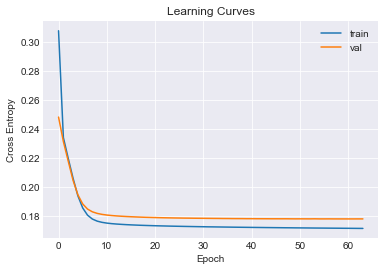

In [177]:
pyplot.style.use('seaborn-darkgrid')
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(fit_model2.history['loss'], label='train')
pyplot.plot(fit_model2.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

## Attempt 26
### Removed all dropout layers and patience same as previous

In [178]:
# Split our preprocessed data into our features and target arrays
y = df_no_pre2["Diabetes_012"].values
X = df_no_pre2.drop(columns=['Diabetes_012']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [179]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 70
hidden_nodes_layer2 = 20
hidden_nodes_layer3 = 20
hidden_nodes_layer4 = 10
nn26 = tf.keras.models.Sequential()

# First hidden layer
nn26.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn26.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Dropout
#nn26.add(tf.keras.layers.Dense(5, input_dim=5, kernel_initializer='ones'))

# Third hidden layer
nn26.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Dropout
#nn26.add(tf.keras.layers.Dense(5, input_dim=5, kernel_initializer='ones'))

# Fourth hidden layer
nn26.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn26.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn26.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_134 (Dense)            (None, 70)                1540      
_________________________________________________________________
dense_135 (Dense)            (None, 20)                1420      
_________________________________________________________________
dense_136 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_137 (Dense)            (None, 10)                210       
_________________________________________________________________
dense_138 (Dense)            (None, 1)                 11        
Total params: 3,601
Trainable params: 3,601
Non-trainable params: 0
_________________________________________________________________


In [180]:
nn26.compile(loss=tf.keras.losses.Huber(delta=1.0), optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
fit_model3 = nn26.fit(X_train_scaled,y_train, batch_size = 32, epochs=200, callbacks=[callback], validation_split=0.2)

Epoch 1/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.2118 - accuracy: 0.8104 - val_loss: 0.1951 - val_accuracy: 0.8471
Epoch 2/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.1846 - accuracy: 0.8313 - val_loss: 0.1872 - val_accuracy: 0.8023
Epoch 3/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.1802 - accuracy: 0.7964 - val_loss: 0.1846 - val_accuracy: 0.7788
Epoch 4/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.1783 - accuracy: 0.7827 - val_loss: 0.1831 - val_accuracy: 0.7719
Epoch 5/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.1771 - accuracy: 0.7777 - val_loss: 0.1822 - val_accuracy: 0.7678
Epoch 6/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.1763 - accuracy: 0.7755 - val_loss: 0.1815 - val_accuracy: 0.7653
Epoch 7/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.1758 - accuracy: 0.7749 - val_loss: 0.1811 - val_ac

In [181]:
model_loss, model_accuracy = nn26.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1946/1946 - 1s - loss: 0.1759 - accuracy: 0.7766
Loss: 0.17590530216693878, Accuracy: 0.7765607237815857


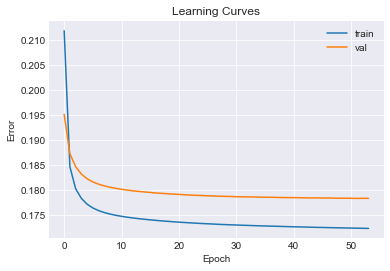

In [182]:
pyplot.style.use('seaborn-darkgrid')
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Error')
pyplot.plot(fit_model3.history['loss'], label='train')
pyplot.plot(fit_model3.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()